# **Project Name**    - Zomato_Restaurant_Clustering_&_Sentiment_Analysis.ipynb



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Project by Mohd Ravi**


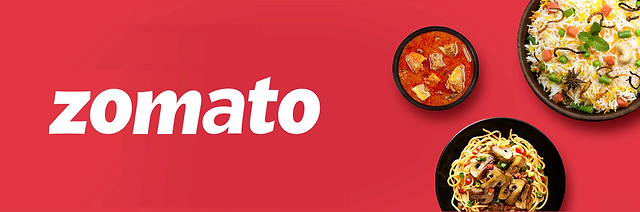

# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

There are two separate files, while the columns are self explanatory. Below is a brief description:

Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

Steps that are performed:

* Importing libraries
* Loading the dataset 
* Shape of dataset
* Dataset information 
* Handling the duplicate values
* Handling missing values.
* Understanding the columns
* Variable description
* Data wrangling
* Data visualization
* Story telling and experimenting with charts.
* Text preprocessing,
* clustering
* Sentiment analysis
* Conclusion.

# **GitHub Link -**

https://github.com/mohdraavi/Zomato_Restaurant_Clustering_-_Sentiment_Analysis

# **Problem Statement**


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud
from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#importing kmeans
from sklearn.cluster import KMeans

#importing random forest and XgB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negative matrix Factorization
from sklearn.decomposition import NMF


from sklearn.naive_bayes import MultinomialNB

#principal component analysis
from sklearn.decomposition import PCA

#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer
#silhouette score
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
restaurant_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')
review_df = pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

### Dataset First View

In [4]:
# Dataset First Look restaurant
restaurant_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
#first loot review
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print('Total Number rows and columns in restaurant_df :',restaurant_df.shape)
print('Total Number rows and columns in reviews_df : ',review_df.shape)

Total Number rows and columns in restaurant_df : (105, 6)
Total Number rows and columns in reviews_df :  (10000, 7)


### Dataset Information

In [7]:
# Dataset Info
print('restaurant_df info :')
print(restaurant_df.info())
print('-'*50)
print('Review_df info :')
print(review_df.info())


restaurant_df info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB
None
--------------------------------------------------
Review_df info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pi

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
print('Numbe of duplicate rows in restaurant_df')
print(len(restaurant_df)-len(restaurant_df.drop_duplicates()))
print('-'*50)

print('Numbe of duplicate rows in review_df')
print(len(review_df)-len(review_df.drop_duplicates()))


Numbe of duplicate rows in restaurant_df
0
--------------------------------------------------
Numbe of duplicate rows in review_df
36


we can see there is no duplicate row in restaurant_df 

but there are 36 duplicate rows present in review_df

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
print('Missig values in restaurant_df')
print(restaurant_df.isnull().sum())
print('-'*50)
print('Missig values in review_df')
print(review_df.isnull().sum())

Missig values in restaurant_df
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
--------------------------------------------------
Missig values in review_df
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64


Text(0.5, 1.0, 'Missing Values in restaurant_df')

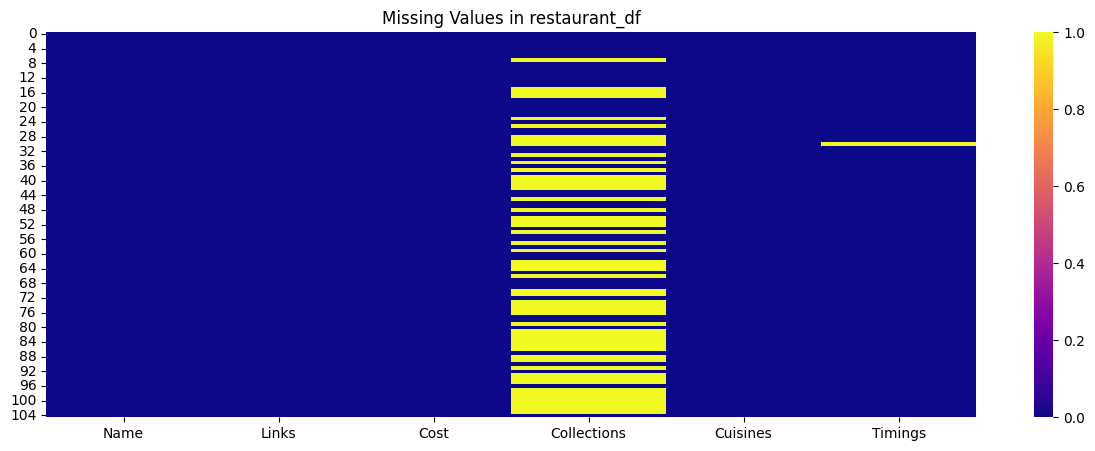

In [10]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(restaurant_df.isnull(),cmap='plasma',annot=False)
plt.title('Missing Values in restaurant_df')

<Axes: >

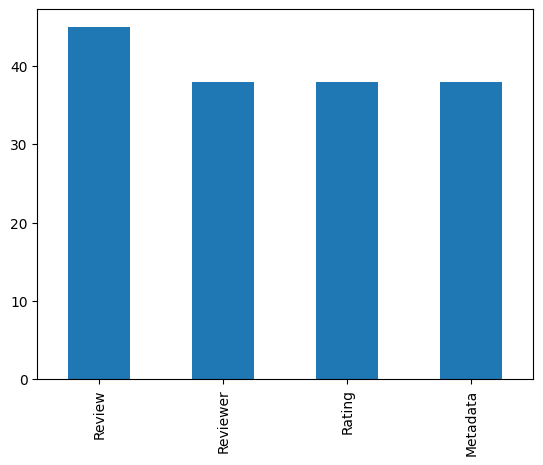

In [11]:
# Visualizing the missing values in review_df
review_df.isnull().sum().sort_values(ascending=False)[:4].plot.bar()

### What did you know about your dataset?

**Restaurant DataSet**
* There are 105 total observation with 6 different features.
* Feature like collection and timing has null values.
* There is no duplicate values i.e., 105 unique data.
* Feature cost represent amount but has object data type because these values are separated by comma ','.
* Timing represent operational hour but as it is represented in the form of text has object data type.

**Review DataSet**
* There are total 10000 observation and 7 features.
* Except picture and restaurant feature all others have null values.
* There are total of 36 duplicate values for two restaurant - American Wild Wings and Arena Eleven, where all these duplicate values generally have null values.
* Rating represent ordinal data, has object data type should be integer.
* Timing represent the time when review was posted but show object data time, it should be converted into date time.


## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
print('Columns in metadata_df :')
print(list(restaurant_df.columns))
print('-'*80)
print('Columns in review_df :')
print(list(review_df.columns))

Columns in metadata_df :
['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings']
--------------------------------------------------------------------------------
Columns in review_df :
['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time', 'Pictures']


In [13]:
# Dataset Describe/
print('Statistical Description of restaurant_df : ')
restaurant_df.describe(include='all')

Statistical Description of restaurant_df : 


,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [14]:
# Dataset Describe/
print('Statistical Description of review_df : ')
review_df.describe(include='all')

Statistical Description of review_df : 


,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description 

**Attributes ▶**

---
**Restaurant**
* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

**Reviews**
* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review




### Check Unique Values for each variable.

In [15]:
restaurant_df.dtypes

Name           object
Links          object
Cost           object
Collections    object
Cuisines       object
Timings        object
dtype: object

In [16]:
# Check Unique Values for each variable in restaurant_df 
print("No. of unique values in Cuisines' is : ",restaurant_df['Cuisines'].nunique())
print('-'*100)
print(restaurant_df['Cuisines'].unique())
print('='*100)
print("No. of unique values in cost  is : ",restaurant_df['Cost'].nunique())
print('-'*100)
print(restaurant_df['Cost'].unique())
print('='*100)
print("No. of unique values in Collections' is : ",restaurant_df['Collections'].nunique())
print('-'*100)
print(restaurant_df['Collections'].unique())


No. of unique values in Cuisines' is :  92
----------------------------------------------------------------------------------------------------
['Chinese, Continental, Kebab, European, South Indian, North Indian'
 'Biryani, North Indian, Chinese'
 'Asian, Mediterranean, North Indian, Desserts'
 'Biryani, North Indian, Chinese, Seafood, Beverages'
 'Asian, Continental, North Indian, Chinese, Mediterranean'
 'Seafood, Goan, North Indian, Continental, Asian'
 'Healthy Food, North Indian, Continental, South Indian' 'Lebanese'
 'American, Chinese, North Indian, Kebab, South Indian'
 'Ice Cream, Desserts' 'Street Food, North Indian, Fast Food'
 'Mediterranean, North Indian, Kebab, BBQ'
 'Continental, American, Chinese' 'North Indian, Italian, Finger Food'
 'European, Mediterranean, North Indian' 'Burger, Fast Food'
 'North Indian' 'Chinese, North Indian'
 'North Indian, Chinese, Continental' 'North Indian, Chinese, Biryani'
 'North Indian, Japanese, Italian, Salad, Sushi' 'American' 'Contine

## 3. ***Data Wrangling***

###**Restaurants**

In [17]:
#copy dataset to preserve original dataframe
restaurants = restaurant_df.copy()
review = review_df.copy()

In [18]:
# Write your code to make your dataset analysis ready.
# changing the data type of the cost function
restaurants['Cost'] = restaurants['Cost'].str.replace(",","").astype('int64')

In [19]:
restaurants['Cost'].dtypes

dtype('int64')

In [20]:
#treating null values
restaurants.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [21]:
restaurants['Cost'].head()

0     800
1     800
2    1300
3     800
4    1200
Name: Cost, dtype: int64

In [22]:
#top 5 costly restaurant
restaurants.sort_values('Cost',ascending=False)[['Name','Cost']][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [23]:
# top 5 cheapest restaurant
restaurants.sort_values('Cost',ascending=False)[['Name','Cost']][-5:]

,Name,Cost
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150
23,Amul,150


In [24]:
rows = restaurants[restaurants['Cost']==150]
rows['Name'].tolist()

['Amul', 'Mohammedia Shawarma']

In [25]:
#restaurants that has same same price
hotel_dict = {}
amount = restaurants.Cost.values.tolist()

#adding hotel name based on the price by converting it into list
for price in amount:
  rows = restaurants[restaurants['Cost']==price]
  hotel_dict[price]=rows['Name'].tolist()

#converting dict to dataframe
same_price_hotel_df = pd.DataFrame.from_dict([hotel_dict]).transpose().reset_index().rename(columns={'index':'Cost',0:'Name of Restaurant'})

hotel_count = restaurants.groupby('Cost')['Name'].count().reset_index().sort_values('Cost',ascending=False)

same_price_hotel_df = same_price_hotel_df.merge(hotel_count, how = 'inner', 
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max hotels that share same price 
same_price_hotel_df.sort_values('Total_Restaurant',ascending=False)[:5]          

,Cost,Name of Restaurant,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


In [26]:
#hotels which has max price 
same_price_hotel_df.sort_values('Cost',ascending=False)[:5]

,Cost,Name of Restaurant,Total_Restaurant
26,2800,[Collage - Hyatt Hyderabad Gachibowli],1
22,2500,[Feast - Sheraton Hyderabad Hotel],1
12,1900,"[10 Downing Street, Jonathan's Kitchen - Holid...",2
25,1800,[Cascade - Radisson Hyderabad Hitec City],1
27,1750,[Zega - Sheraton Hyderabad Hotel],1


In [27]:
#splitting cuisine and storing in list
cuisine_value_list = restaurants.Cuisines.str.split(', ')
cuisine_value_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [28]:
# storing all the cusines in a dict 
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if (cuisine in cuisine_dict):
            cuisine_dict[cuisine]+=1
        else:  
            cuisine_dict[cuisine]=1 

In [29]:
# converting the dict to a data frame 
cuisine_df=pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})

In [30]:
#top 5 cuisine
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


### **Review**

In [31]:
#in order to change data type for rating checking values
review.Rating.value_counts()

5       3832
4       2373
1       1735
3       1193
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

In [32]:
#changing data type for each rating since had value as interger surrounded by inverted comma
#since there is one rating as like converting it to 0 since no rating is 0 then to median
review.loc[review['Rating'] == 'Like'] = 0


In [33]:
#changing data type for rating in review data
review['Rating'] = review['Rating'].astype('float')

In [34]:
#since there is one rating as like converting it to median
review.loc[review['Rating'] == 0] = review.Rating.median()

In [35]:
#changing date and extracting few feature for manipulation

review['Reviewer_Total_Review'],review['Reviewer_Followers']=review['Metadata'].str.split(',').str
review['Reviewer_Total_Review'] = pd.to_numeric(review['Reviewer_Total_Review'].str.split(' ').str[0])
review['Reviewer_Followers'] = pd.to_numeric(review['Reviewer_Followers'].str.split(' ').str[1])
review['Time']=pd.to_datetime(review['Time'])
review['Review_Year'] = pd.DatetimeIndex(review['Time']).year
review['Review_Month'] = pd.DatetimeIndex(review['Time']).month
review['Review_Hour'] = pd.DatetimeIndex(review['Time']).hour

In [36]:
#Average engagement of restaurants
avg_hotel_rating = review.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,4.0,4.00,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


there is one misfilled value restaurant name 4.0

In [37]:
review[review['Restaurant'] == 4.0]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
7601,4.0,4.0,4.0,4.0,4.0,1970-01-01 00:00:00.000000004,4,NaN,NaN,1970.0,1.0,0.0


In [38]:
review=review.drop(review[review['Restaurant'] == 4.0].index)

In [39]:
#finding hotel without review
hotel_without_review = [name for name in restaurants.Name.unique().tolist() 
       if name not in review.Restaurant.unique().tolist()]
hotel_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [40]:
#top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

,Restaurant,Rating,Total_Review
4,AB's - Absolute Barbecues,4.88,100
12,B-Dubs,4.81,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
68,Paradise,4.70,100
36,Flechazo,4.66,100


In [41]:
#top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

,Restaurant,Rating,Total_Review
42,Hotel Zara Hi-Fi,2.400,100
11,Asian Meal Box,2.580,100
67,Pakwaan Grand,2.710,100
58,Mathura Vilas,2.820,100
15,Behrouz Biryani,2.825,100


In [42]:
#Finding the most followed critic
most_followed_reviewer = review.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]

,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5463,Satwinder Singh,186.0,13410.0,3.666667
1701,Eat_vth_me,60.0,13320.0,5.000000
5235,Samar Sardar,8.0,11329.0,3.500000
1787,Foodies Hyderabad,31.0,9494.0,4.500000
6229,Srinivas,34.0,7628.0,3.714286


In [43]:
#finding which year show maximum engagement
hotel_year = review.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count']= hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

,Review_Year,Restaurant,Count
0,2016.0,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
1,2017.0,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
2,2018.0,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4903
3,2019.0,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4802


In [44]:
#merging both data frame
hotel = restaurants.rename(columns = {'Name':'Restaurant'})
merged = hotel.merge(review, on = 'Restaurant')
merged.shape

(9999, 17)

In [45]:
#Price point of restaurants
price_point = merged.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Price_Point'})


In [46]:
#price point for high rated restaurants
price_point.sort_values('Rating',ascending = False)[:5]

,Restaurant,Rating,Price_Point
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0


In [47]:
#price point for lowest rated restaurants
price_point.sort_values('Rating',ascending = True)[:5]

,Restaurant,Rating,Price_Point
41,Hotel Zara Hi-Fi,2.400,400.0
10,Asian Meal Box,2.580,200.0
66,Pakwaan Grand,2.710,400.0
57,Mathura Vilas,2.820,500.0
14,Behrouz Biryani,2.825,600.0


In [48]:
#rating count by reviewer
rating_count_df = pd.DataFrame(review.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]

,Rating_Count
Reviewer,
Ankita,13
Parijat Ray,13
Kiran,12
Jay Mehta,11
Vedant Killa,11


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1   Distplot for Distribution

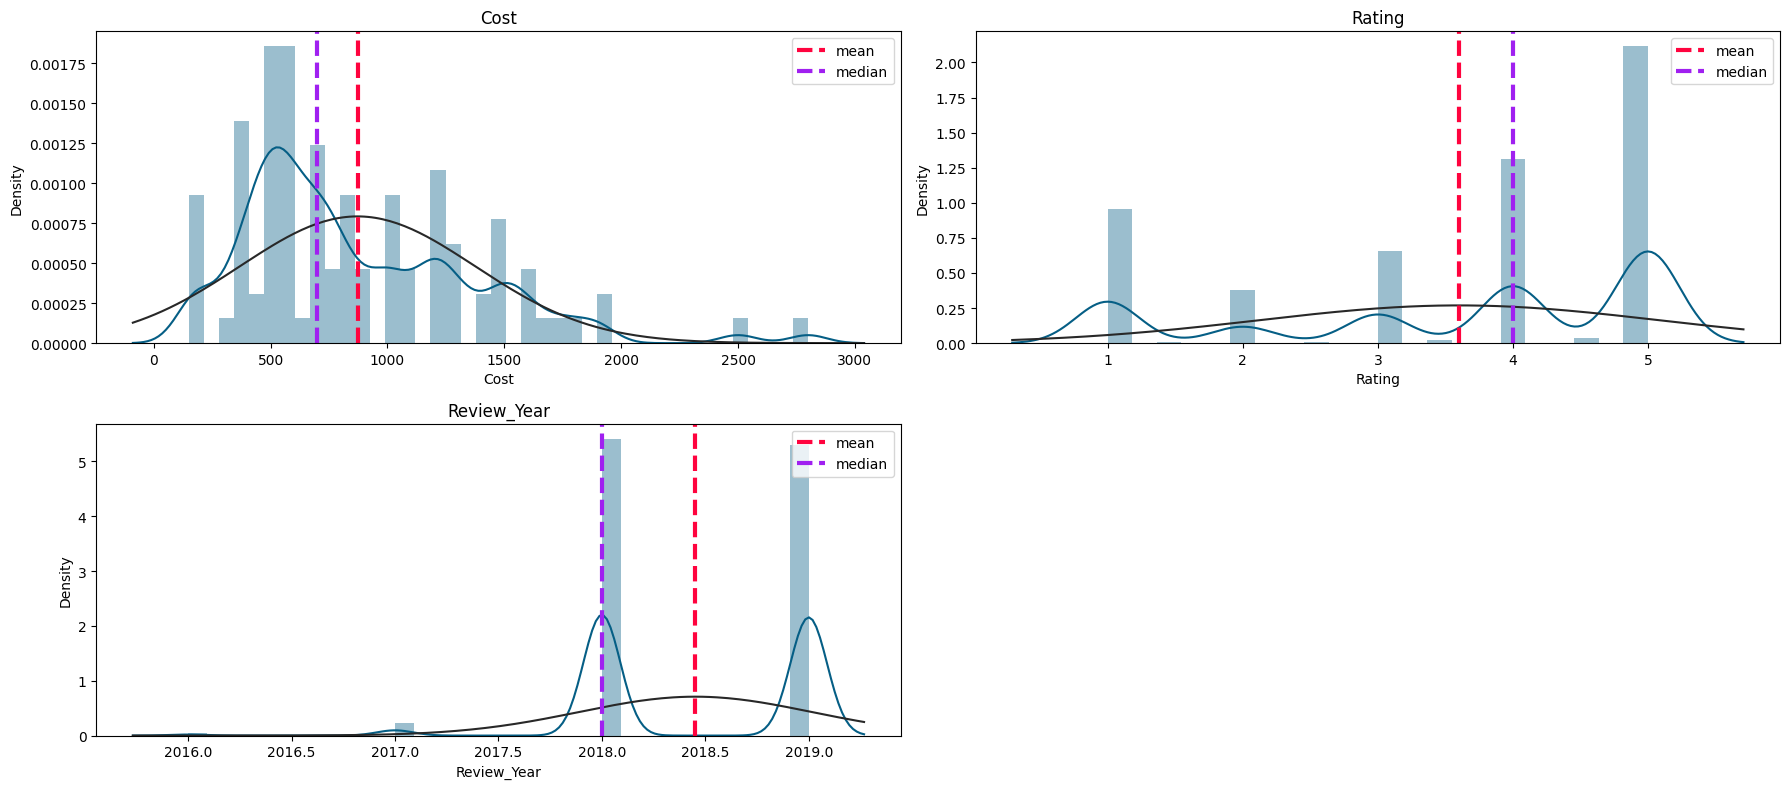

In [49]:
# Chart - 1 visualization code
plt.figure(figsize = (18,8));
for i,col in enumerate(['Cost','Rating','Review_Year']) :
    # plt.figure(figsize = (8,5));
    plt.subplot(2,2,i+1);
    sns.distplot(merged[col], color = '#055E85', fit = norm);
    feature = merged[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    #plt.legend(bbox_to_anchor = (1.0, 1), loc = 'up')
    plt.legend(bbox_to_anchor=(1.0, 1), loc='upper right')
    plt.title(f'{col.title()}');
    plt.tight_layout();

#### Chart - 2  Maximum Engagement and Lowest Engagement

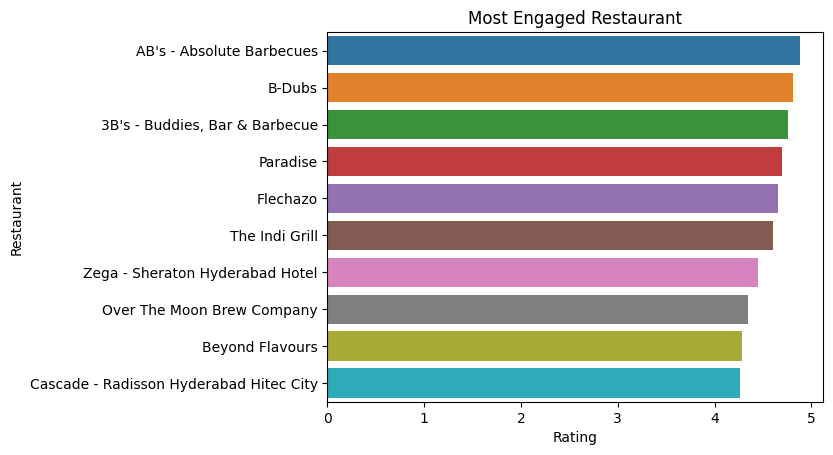

In [50]:
# Chart - 2 visualization code
#plotting top 10 hotels that show maximum engagement
most_engaged_hotel = price_point.sort_values('Rating',ascending=False)

sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

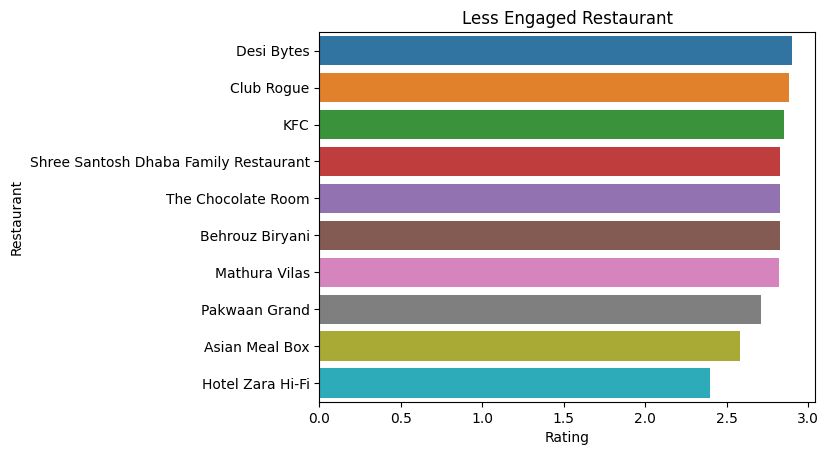

In [51]:
#plot for those which has lowest rating
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less Engaged Restaurant')
plt.show()

#### Chart - 3 Price Point for High Rated and Low Rated Hotels

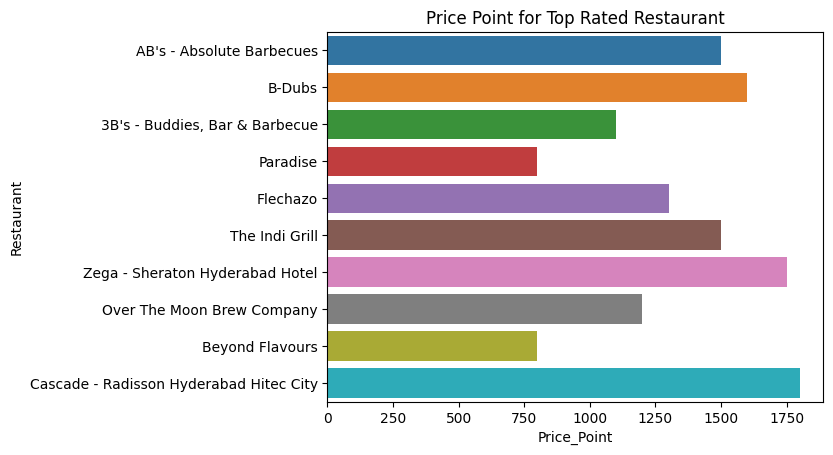

In [52]:
# Chart - 3 visualization code
#price of high rated restaurants
sns.barplot(data=most_engaged_hotel[:10],x='Price_Point',y='Restaurant')
plt.title('Price Point for Top Rated Restaurant')
plt.show()

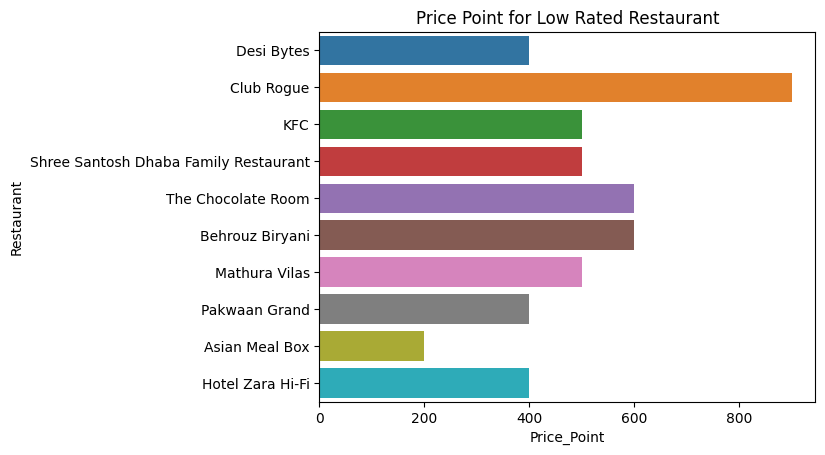

In [53]:
#plotting the price of low rated restaurants
sns.barplot(data=most_engaged_hotel[-10:],x='Price_Point',y='Restaurant')
plt.title('Price Point for Low Rated Restaurant')
plt.show()

#### Chart - 4 Proportion of Cuisine Sold by Most Restaurant

In [54]:
#list of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]

In [55]:
cuisine_list

['North Indian', 'Chinese', 'Continental', 'Biryani', 'Fast Food']

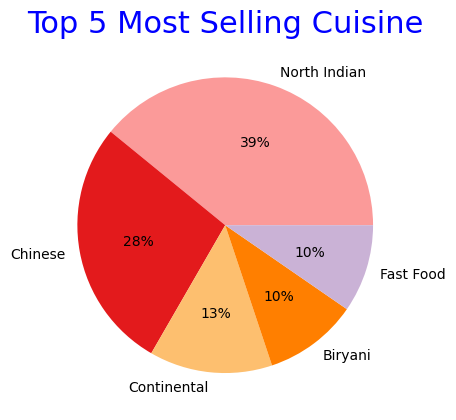

In [56]:
data = cuisine_df.sort_values('Number of Restaurants',ascending=False)['Number of Restaurants'].tolist()[:5]
ls = cuisine_list
colors = sns.color_palette('Paired')[4:9]
#create pie chart
plt.pie(data, labels = ls, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'blue')
plt.show()

In [57]:
#wordcloud for Cuisine
# storing all cuisine in the form of text
plt.figure(figsize=(15,8))
text = " ".join(name for name in cuisine_df.Cuisine )



<Figure size 1500x800 with 0 Axes>

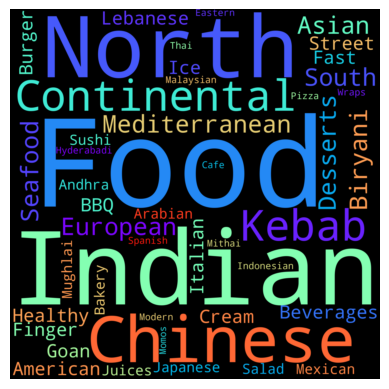

In [58]:
word_cloud = WordCloud(width=2000,height=2000,
                       colormap='rainbow',collocations = False,background_color='black').generate(text)

plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off');

#### Chart - 6 Learn about Reviewers

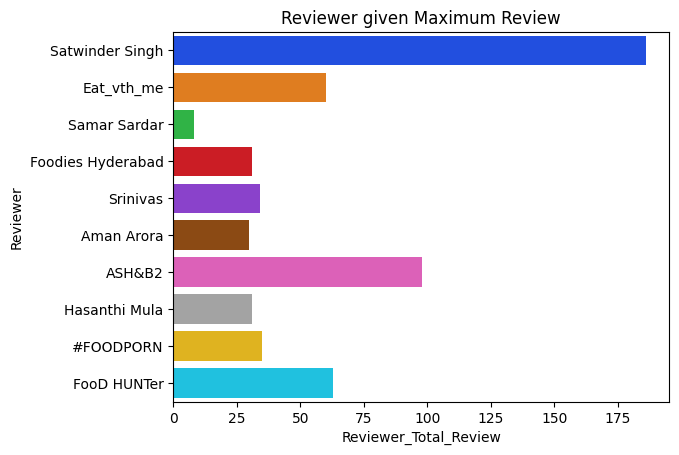

In [59]:
# plotting which reviewer gave maximum reviews
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

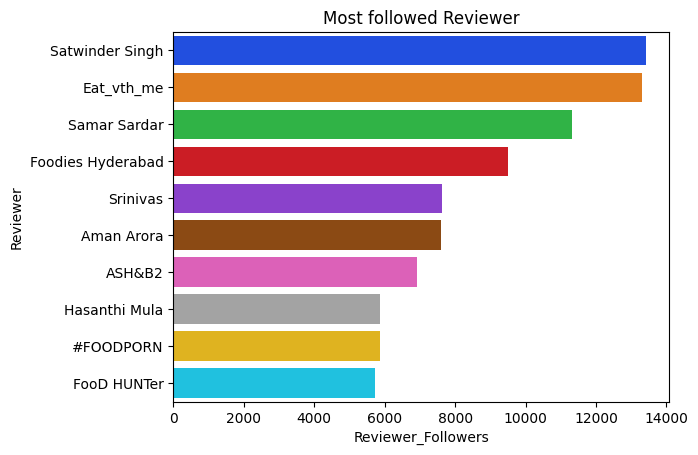

In [60]:
# plotting for most review follower
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers', 
            y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

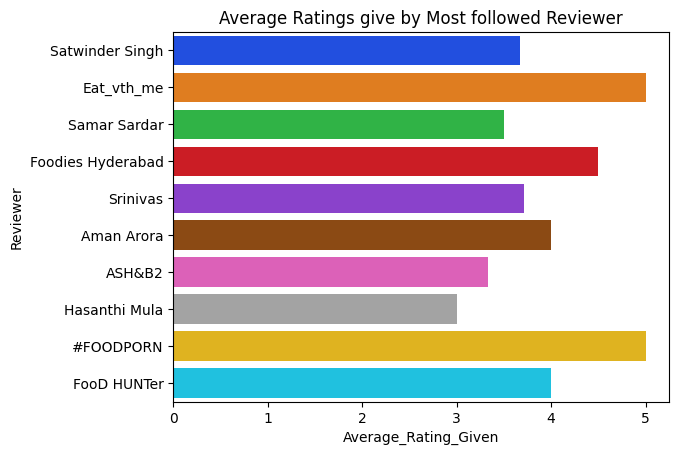

In [61]:
# visualization code for average rating given by most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given', 
            y = 'Reviewer',palette='bright')
plt.title('Average Ratings give by Most followed Reviewer')
plt.show()

#Most Expensive Restaurant

#### Chart - 7 Hotel with Highest Price and Lowest Price

In [62]:
# Chart - 7 visualization code
price_df_hotel = hotel.sort_values('Cost',ascending=False)[['Restaurant','Cost']]

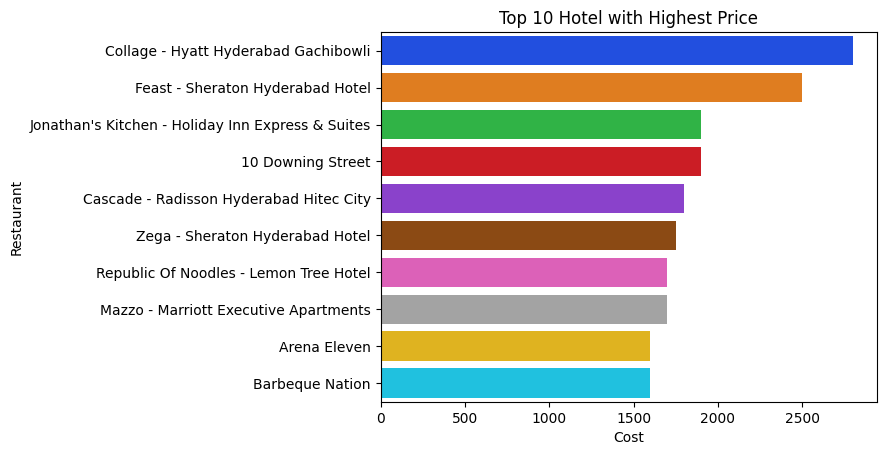

In [63]:
#plotting bar plot for hotels that have highest price
sns.barplot(data = price_df_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')
plt.title('Top 10 Hotel with Highest Price')
plt.show()

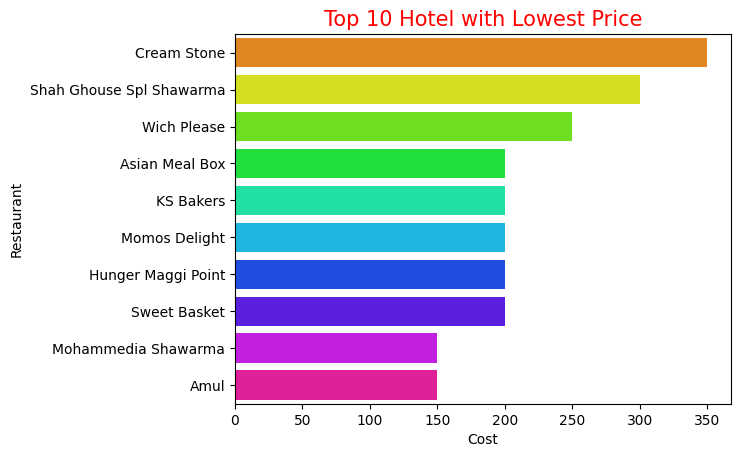

In [64]:
# plotting bar plot for hotels with lowest price
sns.barplot(data = price_df_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')
plt.title('Top 10 Hotel with Lowest Price', size =15, color = 'red')
plt.show()

In [65]:
#merging average rating and cost to find rating for expensive hotel
expected_revenue = avg_hotel_rating.merge(hotel[['Restaurant','Cost']], on = 'Restaurant')
#calculating expected revenue based on total review recieved
expected_revenue['Expected_Revenue'] = expected_revenue['Total_Review'] * expected_revenue['Cost']


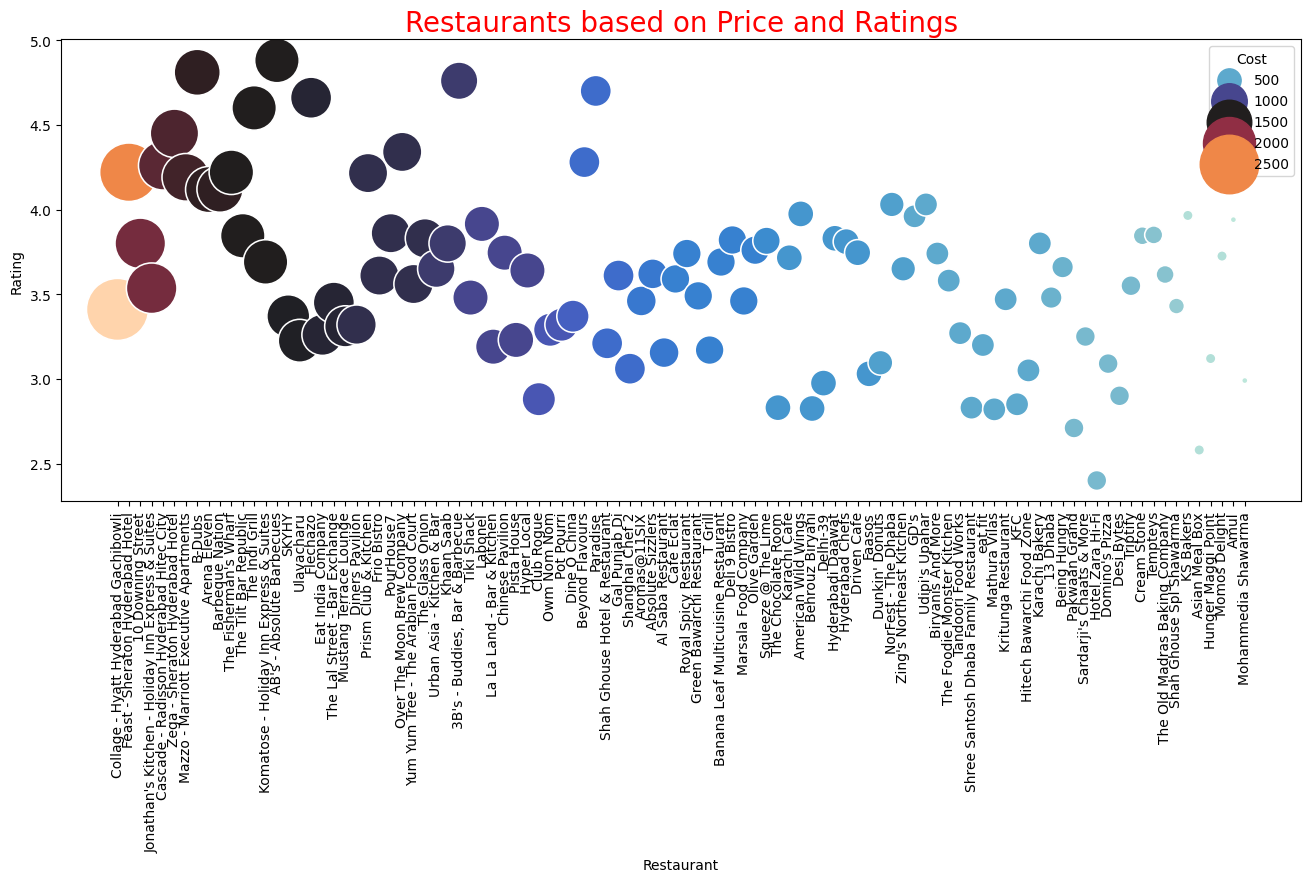

In [66]:
#chart for rating based on price and hotel
plt.figure(figsize=(16,6))
data = expected_revenue.sort_values('Cost', ascending  = False)
sns.scatterplot(data= data, x= "Restaurant", y="Rating", size="Cost", 
                hue = 'Cost',legend=True, sizes=(20, 2000),palette ="icefire")
plt.xticks(rotation=90)
plt.title('Restaurants based on Price and Ratings',size=20,color = 'red')
plt.show()

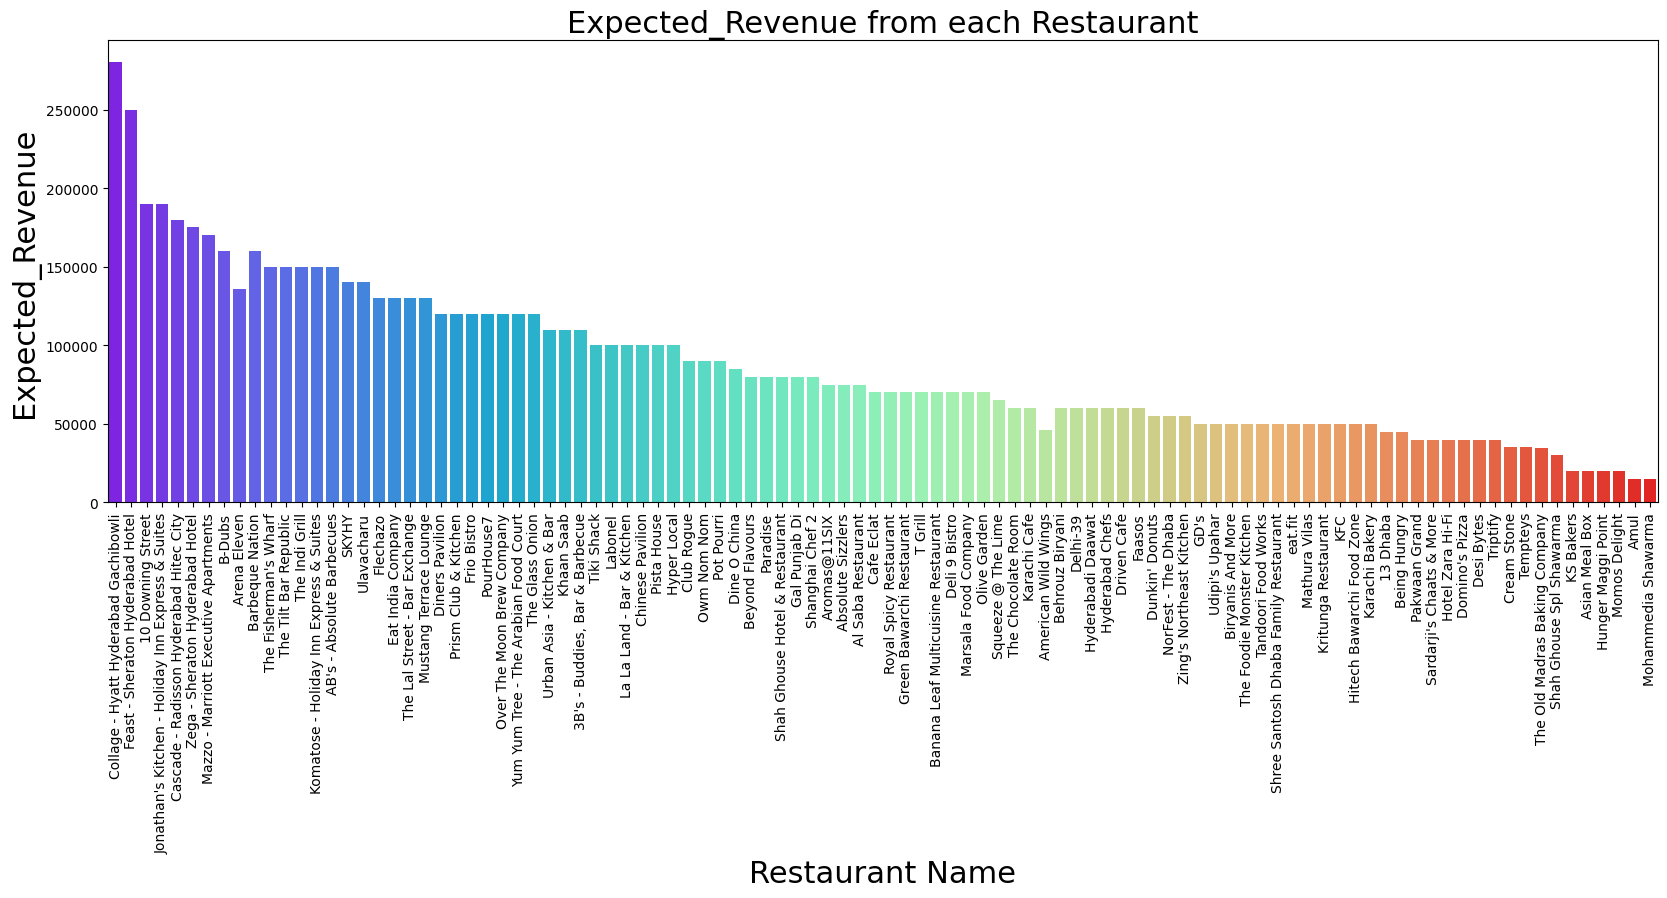

In [67]:
#chart to understand expected revenue
fig = plt.figure(figsize=[20,6])
sns.barplot(data= data, x='Restaurant', y= 'Expected_Revenue', palette ="rainbow")
plt.title("Expected_Revenue from each Restaurant", size = 22)
plt.xlabel('Restaurant Name', size = 22)
plt.xticks(rotation=90)
plt.ylabel('Expected_Revenue', size = 22)
plt.show()

#### Chart - 8 Correlation Heatmap

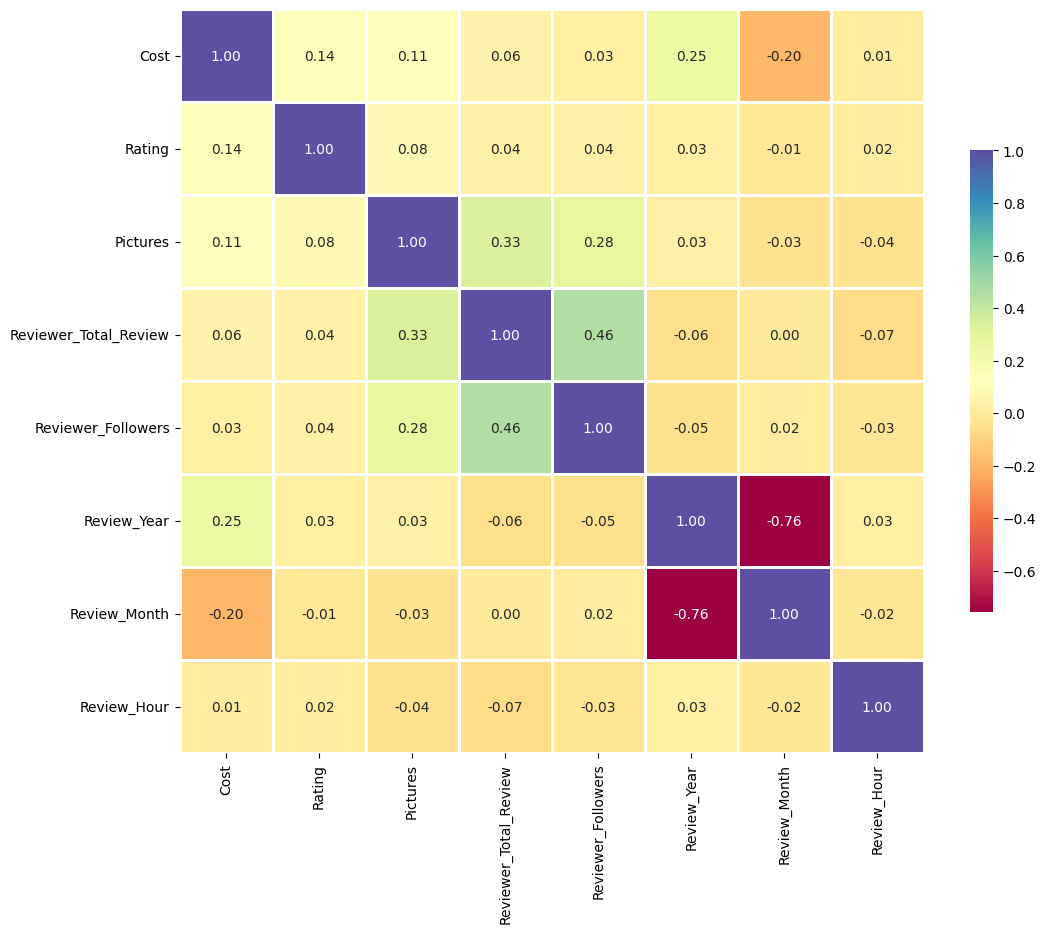

In [68]:
# Chart - 8 visualization code
#Correlation heatmap between each variables
plt.figure(figsize=(12,10))   
sns.heatmap(merged.corr(), cmap="Spectral", cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

#### Chart - 9 pair plot

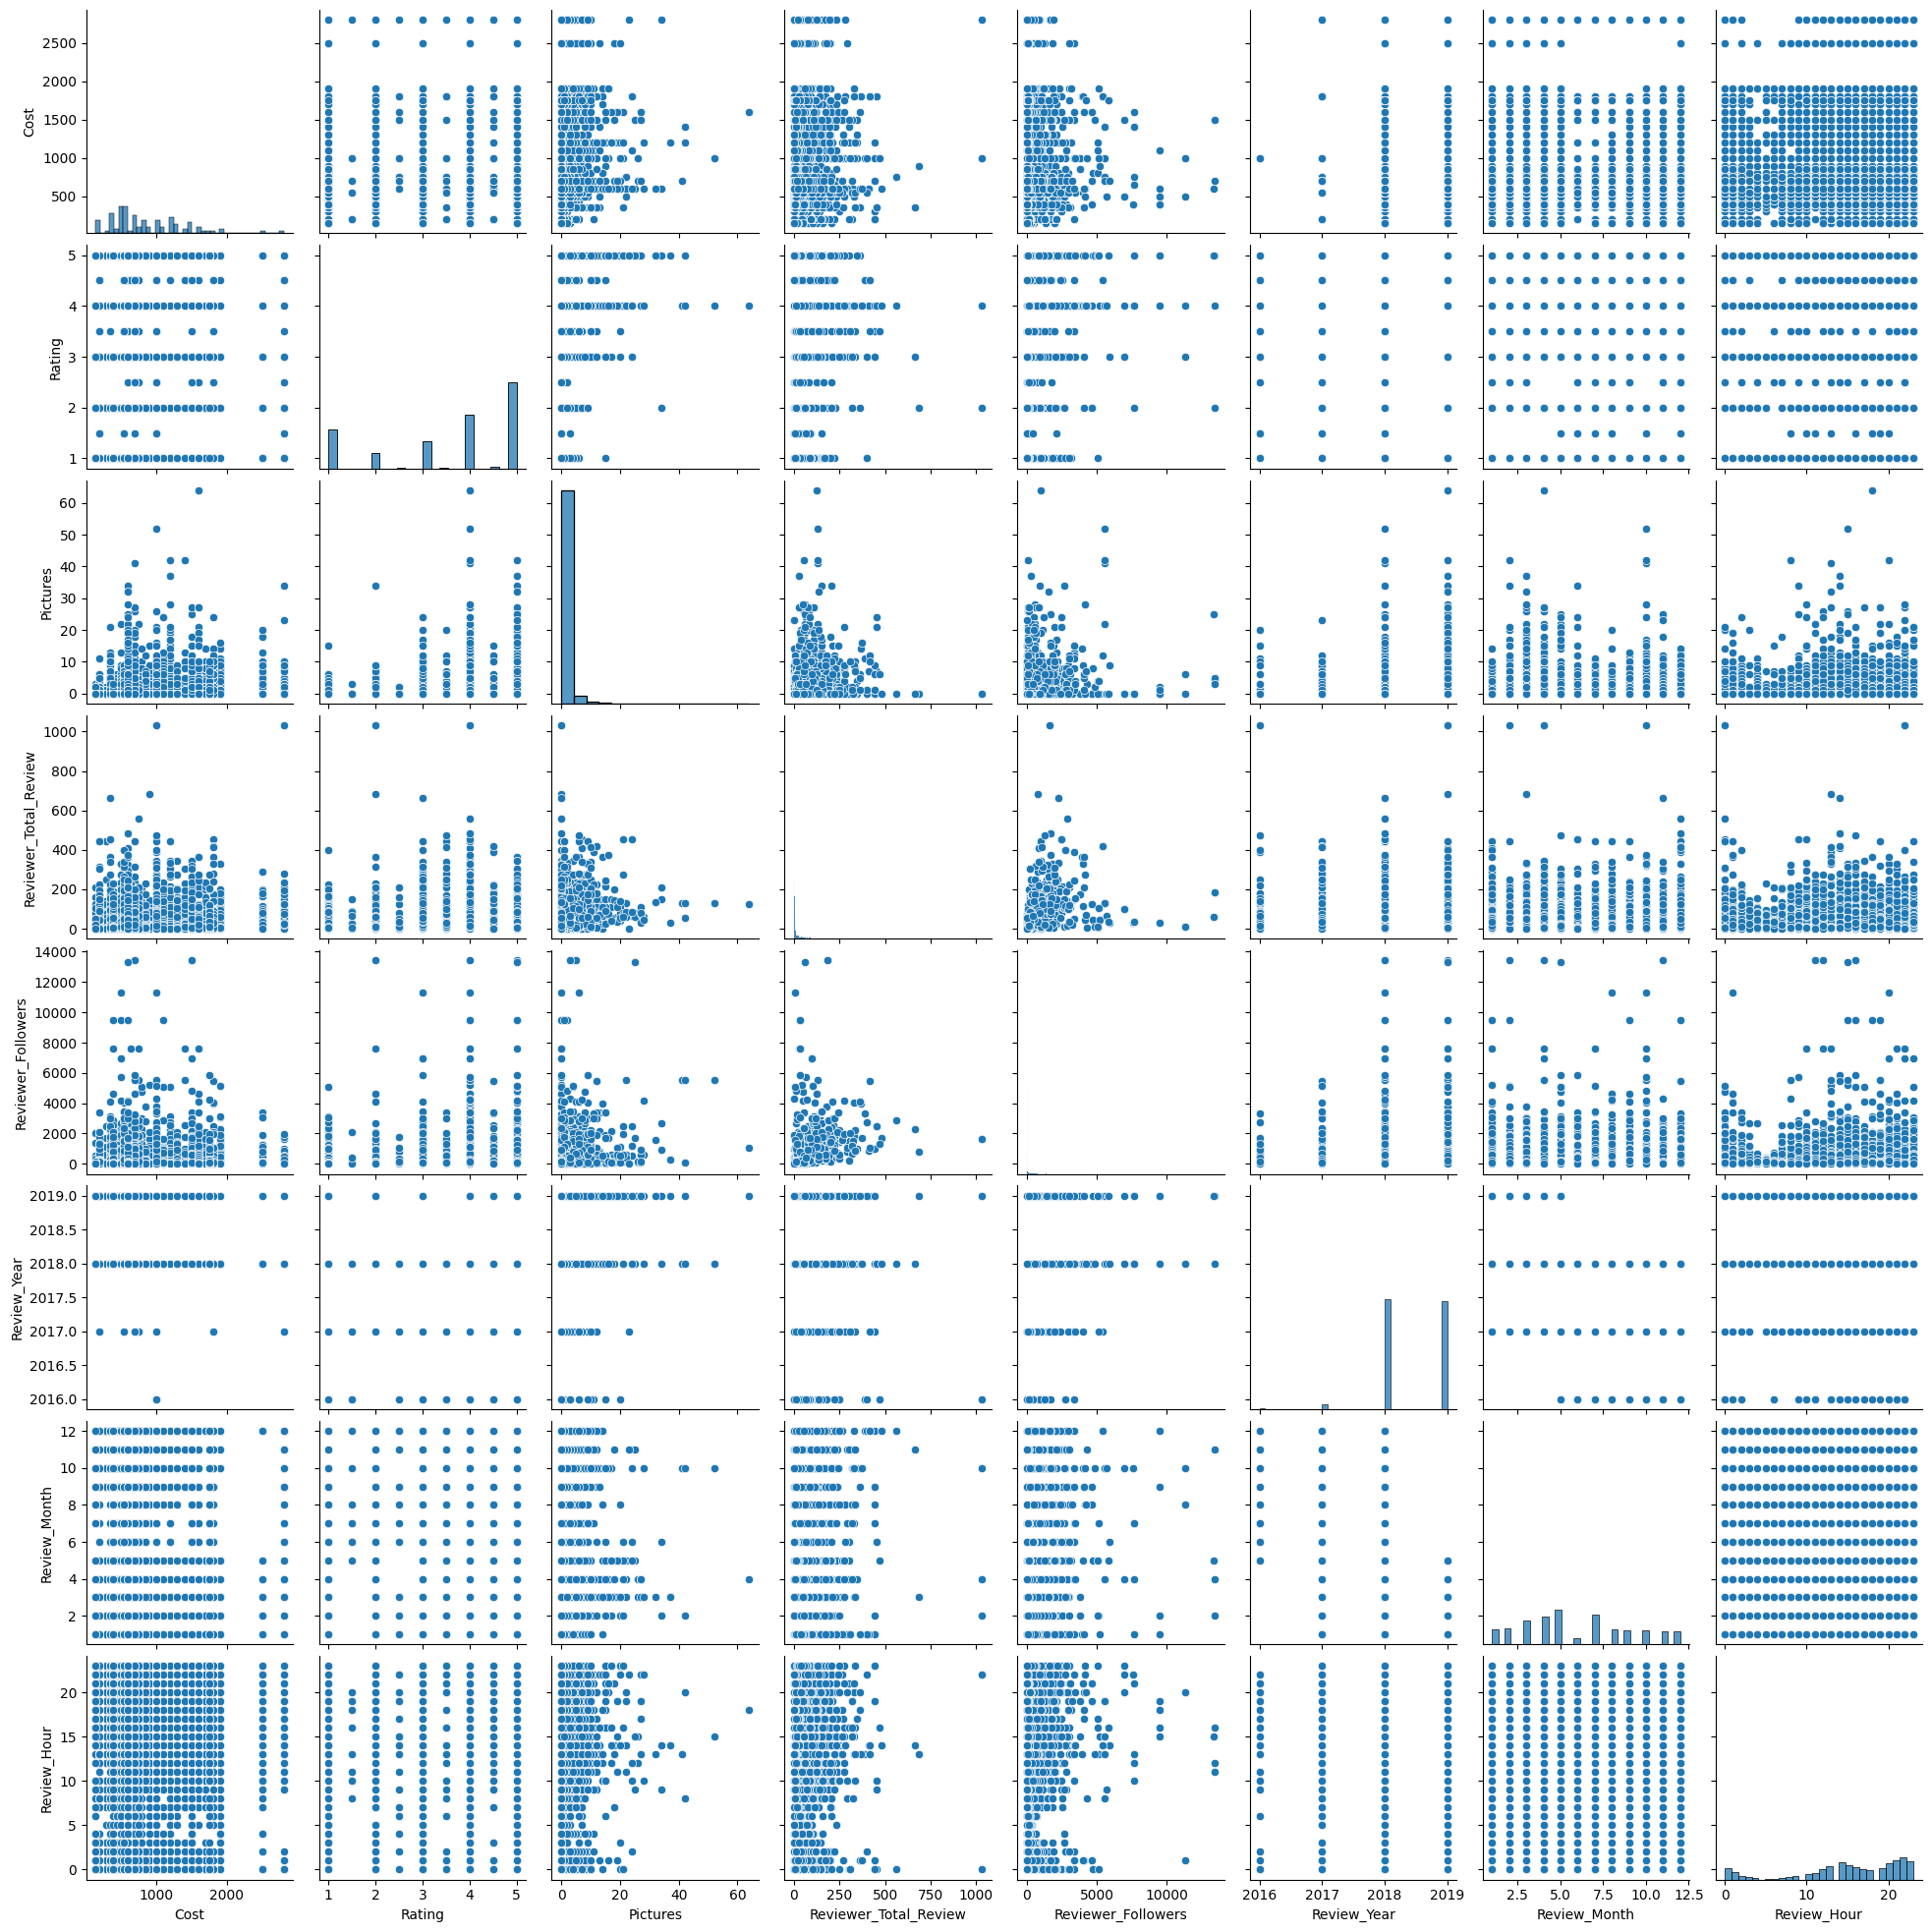

In [69]:
# Chart - 9 visualization code
# Pair Plot visualization code
sns.pairplot(merged);

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

* The cost of a restaurant is positively correlated with the rating it receives.
* Restaurants that offer a wider variety of cuisines will have a higher rating.

### Hypothetical Statement - 1

The cost of a restaurant is positively correlated with the rating it receives.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: There is no relationship between the cost of restaurant and the rating it receives. (H0: 𝛽1 = 0)
* Alternative hypothesis: There is a positive relationship between the cost of a restaurant and the rating it receives. (H1: 𝛽1 > 0)
* Test : Simple Linear Regression Analysis

#### 2. Perform an appropriate statistical test.

In [70]:
# Perform Statistical Test to obtain P-Value
import statsmodels.formula.api as smf


# fit the linear model
model = smf.ols(formula='Rating ~ Cost', data= merged).fit()

# Check p-value of coefficient
p_value = model.pvalues[1]
if p_value < 0.05:
    print("Reject Null Hypothesis - There is no relationship between the cost of\
 restaurant and the rating it receives.")
else:
    print("Fail to reject Null Hypothesis - There is a positive relationship \
 between the cost of a restaurant and the rating it receives.")

Reject Null Hypothesis - There is no relationship between the cost of restaurant and the rating it receives.


##### Which statistical test have you done to obtain P-Value?

I have used Linear regression test for checking the relationship between the cost of a restaurant and its rating

##### Why did you choose the specific statistical test?

I chose this test because it is a common and straightforward method for testing the relationship between two continuous variables. This would involve fitting a linear model with the rating as the dependent variable and the cost as the independent variable. The p-value of the coefficient for the cost variable can then be used to determine if there is a statistically significant relationship between the two variables.

### Hypothetical Statement - 2



Restaurants that offer a wider variety of cuisines will have a higher rating.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

* Null hypothesis: The variety of cuisines offered by a restaurant has no effect on its rating. (H0: 𝛽3 = 0)
* Alternative hypothesis: The variety of cuisines offered by a restaurant has a positive effect on its rating. (H1: 𝛽3 > 0)
* Test : Chi-Squared Test

#### 2. Perform an appropriate statistical test.

In [71]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# create a contingency table
ct = pd.crosstab(merged['Cuisines'], merged['Rating'])

# perform chi-squared test
chi2, p, dof, expected = chi2_contingency(ct)

# Check p-value
if p < 0.05:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")


Reject Null Hypothesis


##### Which statistical test have you done to obtain P-Value?

For the second hypothesis, I have used chi-squared test for independence to test the relationship between the variety of cuisines offered by a restaurant and its rating.

##### Why did you choose the specific statistical test?

I choose this test because it is suitable for comparing the relationship between two categorical variables. This would involve creating a contingency table with the number of restaurants that offer each cuisine as the rows and the rating of the restaurant as the columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

###Treating Duplicates

In [72]:
review.duplicated().sum()

36

In [73]:
#dropping duplicates values of reviews
review = review.drop_duplicates()

In [74]:
review.duplicated().sum()

0

###Treating Missing Values

###Restaurants

In [75]:
restaurants.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [76]:
#checking the null value in timing
hotel[hotel['Timings'].isnull()]

,Restaurant,Links,Cost,Collections,Cuisines,Timings
30,Pot Pourri,https://www.zomato.com/hyderabad/pot-pourri-ga...,900,NaN,"Andhra, South Indian, North Indian",NaN


we will drop collection because it has missing values more than 50%

In [77]:
restaurants.drop(columns={'Collections'},inplace=True)

In [78]:
restaurants.isnull().sum()

Name        0
Links       0
Cost        0
Cuisines    0
Timings     1
dtype: int64

In [79]:
#filling null values in timing 
restaurants.Timings.fillna(restaurants.Timings.mode()[0],inplace=True)

In [80]:
restaurants.isnull().sum()


Name        0
Links       0
Cost        0
Cuisines    0
Timings     0
dtype: int64

###Reviews

In [81]:
review.isnull().sum()


Restaurant                  0
Reviewer                    2
Review                      9
Rating                      2
Metadata                    2
Time                        2
Pictures                    0
Reviewer_Total_Review       2
Reviewer_Followers       1580
Review_Year                 2
Review_Month                2
Review_Hour                 2
dtype: int64

In [82]:
#checking null values of reviewer
review[review['Reviewer'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [83]:
#checking null Reviewer_Total_Review
review[review['Reviewer_Total_Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN
9085,Arena Eleven,NaN,NaN,NaN,NaN,NaT,0,NaN,NaN,NaN,NaN,NaN


In [84]:
#dropping null values in reviewer and Reviewer_Total_Review column as all values are null
review = review.dropna(subset=['Reviewer','Reviewer_Total_Review'])

In [85]:
#again checking the remaining values 
null_counts = [(x,c) for x,c,in review.isnull().sum().items() if c>0]
null_counts

[('Review', 7), ('Reviewer_Followers', 1578)]

In [86]:
review = review.fillna({'Review':'No REview','Reviewer_Followers':0})

In [87]:
# final checking null values
review.isnull().sum()

Restaurant               0
Reviewer                 0
Review                   0
Rating                   0
Metadata                 0
Time                     0
Pictures                 0
Reviewer_Total_Review    0
Reviewer_Followers       0
Review_Year              0
Review_Month             0
Review_Hour              0
dtype: int64

Now we have cleaned our data

In [88]:
restaurants.head()

,Name,Links,Cost,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [89]:
restaurants.rename(columns={'Name':'Restaurant'},inplace=True)

In [90]:
#merging both dataset
merged = restaurants.merge(review, on = 'Restaurant')
merged.shape

(9961, 16)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I started treating missing values by first removing the duplicate data where all other values were NaN or null values except had restaurant name, so instead of replacing each null value I removed it as it was only 36 duplicate data which had no unique identity.

Dataset that contains details about hotel, had 1 null value in timing feature and more than 50% null value in collection feature. In order to treat with those I first replaced the null value for timing with mode since there was only one null and mode is robust to outliers plus that hotel name was one unique feature which had all other feature except timing and collection so it was better to preserve that data. Since there was more than 50% null values in collection feature, I removed the entire column because columns with a high percentage of null values are likely to have a lot of missing data, which can make it difficult to accurately analyze or make predictions based on the data.

In the dataset tha has details of reviewer had Reviewer             -       2,
Review               -       9,
Rating               -       2,
Metadata             -       2,
Time                 -       2,
Reviewer_Total_Review-       3,
Reviewer_Followers   -    1581,
Review_Year          -       2,
Review_Month         -       2,
Review_Hour          -       2. 
On analysing I found that feature like reviewer and reviewer total review had all null values, therefore I removed those two columns which made null values in other feature to zero except in review and reviewer followers columns. Since review was textual data, I changed those 7 null values to 'no review' and reviewer followers to 0 as follower is the meta data for reviewer and it can be 0.

And thus all the null values were treated, at the end I then again merged both the dataset hotel and review dataset.

### 2. Handling Outliers

###Detecting Anamoly

In [91]:

#checking for normal distribution 
print("Skewness - Cost: %f" % merged['Cost'].skew())
print("Kurtosis - Cost: %f" % merged['Cost'].kurt())
print("Skewness - Reviewer_Followers: %f" % merged['Reviewer_Followers'].skew())
print("Kurtosis - Reviewer_Followers: %f" % merged['Reviewer_Followers'].kurt())

Skewness - Cost: 1.153637
Kurtosis - Cost: 1.571590
Skewness - Reviewer_Followers: 10.092703
Kurtosis - Reviewer_Followers: 151.312960


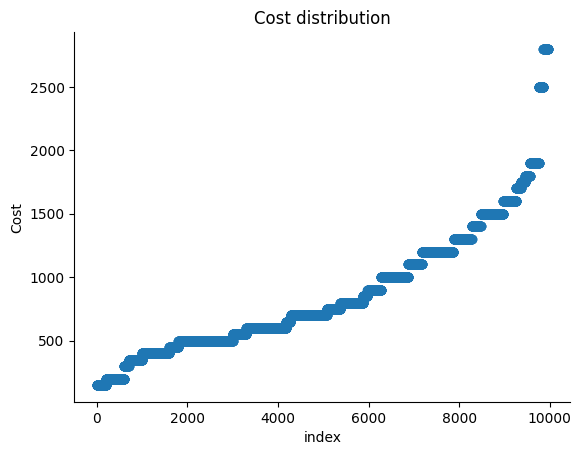

In [92]:
#plotting graph for cost
plt.scatter(range(merged.shape[0]), np.sort(merged['Cost'].values))
plt.xlabel('index')
plt.ylabel('Cost')
plt.title("Cost distribution")
sns.despine()


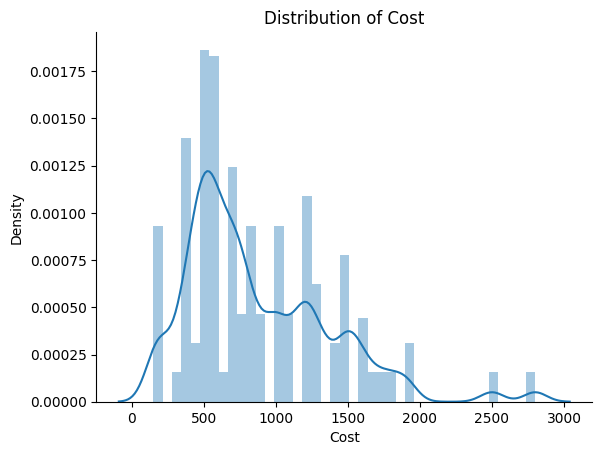

In [93]:
#distribution of cost
sns.distplot(merged['Cost'])
plt.title("Distribution of Cost")
sns.despine()

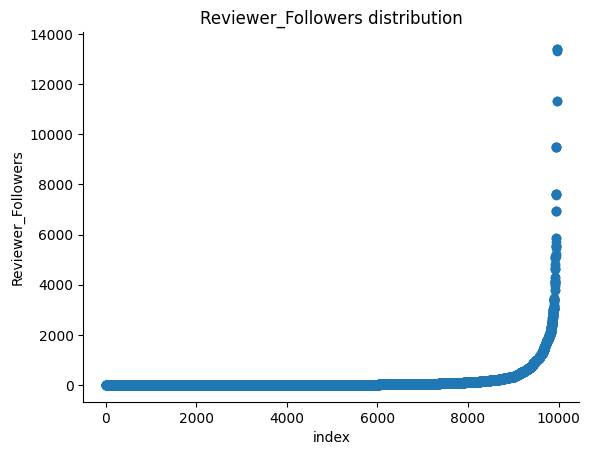

In [94]:
plt.scatter(range(merged.shape[0]),np.sort(merged['Reviewer_Followers'].values))
plt.xlabel('index')
plt.ylabel('Reviewer_Followers')
plt.title("Reviewer_Followers distribution")
sns.despine()

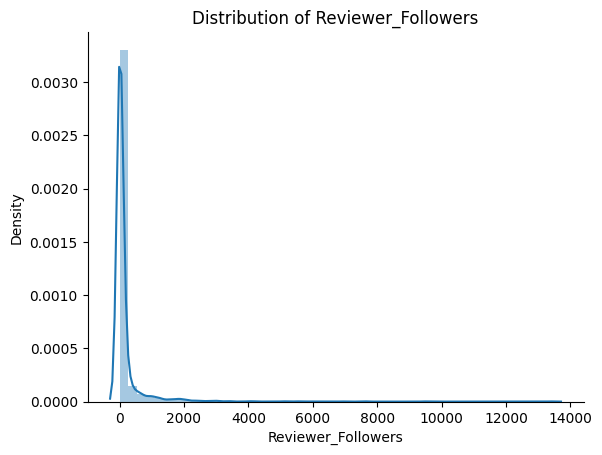

In [95]:
#distribution of Reviewer_Followers
sns.distplot(merged['Reviewer_Followers'])
plt.title("Distribution of Reviewer_Followers")
sns.despine()

In [96]:
#isolation forest for anamoly detection on cost
isolation_forest = IsolationForest(n_estimators=100,contamination=0.01)
isolation_forest.fit(merged['Cost'].values.reshape(-1,1))
merged['anomaly_score_univariate_cost'] = isolation_forest.decision_function(merged['Cost'].values.reshape(-1,1))
merged['outlier_univariate_cost'] = isolation_forest.predict(merged['Cost'].values.reshape(-1,1))

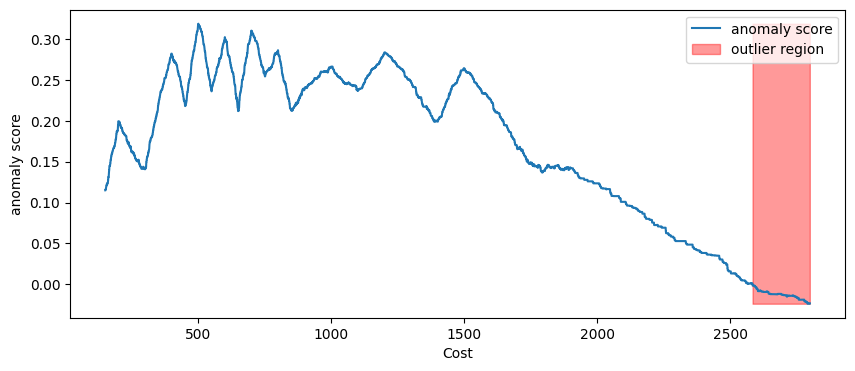

In [97]:
#chart to visualize outliers
xx = np.linspace(merged['Cost'].min(), merged['Cost'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Cost')
plt.show();

In [98]:
#isolation forest for anamoly detection of reviewer follower
isolation_forest = IsolationForest(n_estimators=100, contamination=0.01)
isolation_forest.fit(merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['anomaly_score_univariate_follower'] = isolation_forest.decision_function(
    merged['Reviewer_Followers'].values.reshape(-1, 1))
merged['outlier_univariate_follower'] = isolation_forest.predict(
    merged['Reviewer_Followers'].values.reshape(-1, 1))


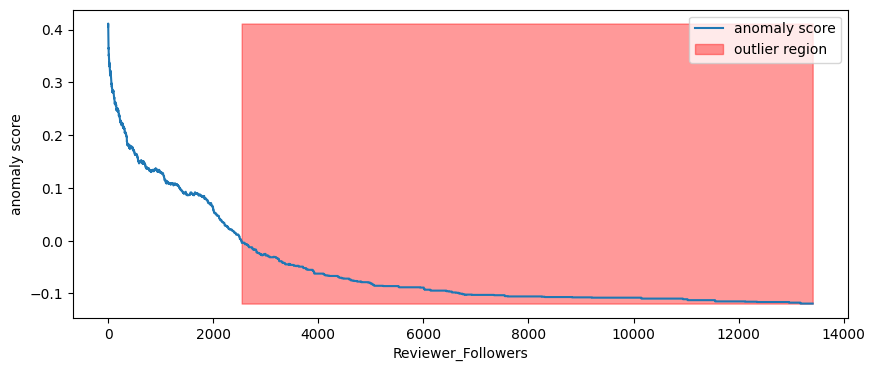

In [99]:
#chat to visualize outliers in reviwer follower column
xx = np.linspace(merged['Reviewer_Followers'].min(), merged['Reviewer_Followers'].max(), len(merged)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score),
where=outlier==-1, color='r',
alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Reviewer_Followers')
plt.show();

###Treating the outliers

In [100]:
# Handling Outliers & Outlier treatments
# To separate the symmetric distributed features and skew symmetric distributed features
symmetric_feature=[]
non_symmetric_feature=[]
for i in merged.describe().columns:
  if abs(merged[i].mean()-merged[i].median())<0.2:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['anomaly_score_univariate_cost', 'outlier_univariate_cost', 'anomaly_score_univariate_follower', 'outlier_univariate_follower']
Skew Symmetric Distributed Features : - ['Cost', 'Rating', 'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers', 'Review_Year', 'Review_Month', 'Review_Hour']


In [101]:
# For Skew Symmetric features defining upper and lower boundry
#Outer Fence
def outlier_treatment_skew(df,feature):
  IQR= df[feature].quantile(0.75)- df[feature].quantile(0.25)
  lower_bridge =df[feature].quantile(0.25)- 1.5*IQR
  upper_bridge =df[feature].quantile(0.75)+ 1.5*IQR
  # print(f'upper : {upper_bridge} lower : {lower_bridge}')
  return upper_bridge,lower_bridge

In [102]:
# Restricting the data to lower and upper boundary for cost in hotel dataset
#lower limit capping
hotel.loc[hotel['Cost']<= outlier_treatment_skew(df=hotel,
  feature='Cost')[1], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[1]

#upper limit capping
hotel.loc[hotel['Cost']>= outlier_treatment_skew(df=hotel,
  feature='Cost')[0], 'Cost']=outlier_treatment_skew(df=hotel,feature='Cost')[0]

In [103]:
# Restricting the data to lower and upper boundary for Reviewer followers in review dataset
#lower limit capping
review.loc[review['Reviewer_Followers']<= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[1], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[1]

#upper limit capping
review.loc[review['Reviewer_Followers']>= outlier_treatment_skew(df=review,
  feature='Reviewer_Followers')[0], 'Reviewer_Followers']=outlier_treatment_skew(
      df=review,feature='Reviewer_Followers')[0]

In [104]:
#dropping the columns created while outliers treatment
merged.drop(columns =['anomaly_score_univariate_cost','outlier_univariate_cost',
  'anomaly_score_univariate_follower','outlier_univariate_follower'], inplace = True)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Since cost and reviewer follower feature or column show positive skewed distribution and using isolation forest found they have outliers, hence using the capping technique instead of removing the outliers, capped outliers with the highest and lowest limit using IQR method.

### 3. Categorical Encoding

In [105]:
# Encode your categorical columns

#categorial encoding using pd.getdummies
#new df with important categories
cluster_dummy = hotel[['Restaurant','Cuisines']]
#spliting cuisines as they are separted with comma and converting into list
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].str.split(',')
#using explode converting list to unique individual items
cluster_dummy = cluster_dummy.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
cluster_dummy['Cuisines'] = cluster_dummy['Cuisines'].apply(lambda x: x.strip())
#using get dummies to get dummies for cuisines
cluster_dummy = pd.get_dummies(cluster_dummy, columns=["Cuisines"], prefix=["Cuisines"])

#checking if the values are correct
# cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].eq(1)[:5].T
cluster_dummy.loc[:, cluster_dummy.columns.str.startswith('Cuisines_')].idxmax(1)[:6]

#replacing cuisines_ from columns name - for better understanding run seperatly

# cluster_dummy.columns = cluster_dummy.columns.str.replace(" ","")
cluster_dummy.columns = cluster_dummy.columns.str.replace("Cuisines_","")
# cluster_dummy = cluster_dummy.groupby(cluster_dummy.columns, axis=1).sum()

#grouping each restaurant as explode created unnecessary rows
cluster_dummy = cluster_dummy.groupby("Restaurant").sum().reset_index()

In [106]:
#total cuisine count 
hotel['Total_Cuisine_Count'] = hotel['Cuisines'].apply(lambda x : len(x.split(',')))

In [107]:
avg_hotel_rating

,Restaurant,Rating,Total_Review
0,4.0,4.00,1
1,10 Downing Street,3.80,100
2,13 Dhaba,3.48,100
3,"3B's - Buddies, Bar & Barbecue",4.76,100
4,AB's - Absolute Barbecues,4.88,100
...,...,...,...
96,Urban Asia - Kitchen & Bar,3.65,100
97,Yum Yum Tree - The Arabian Food Court,3.56,100
98,Zega - Sheraton Hyderabad Hotel,4.45,100
99,Zing's Northeast Kitchen,3.65,100


In [108]:
#adding average rating - will remove 5 unrated restaurant from 105 restaurant
avg_hotel_rating.rename(columns = {'Rating':'Average_Rating'}, inplace =True)
hotel = hotel.merge(avg_hotel_rating[['Average_Rating','Restaurant']], on = 'Restaurant')
hotel.head(1)

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Total_Cuisine_Count,Average_Rating
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",6,4.28


In [109]:
#adding cost column to the new dataset 
cluster_dummy = hotel[['Restaurant','Cost','Average_Rating','Total_Cuisine_Count'
                      ]].merge(cluster_dummy, on = 'Restaurant')

In [110]:
cluster_dummy

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,Beyond Flavours,800,4.280,6,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,4.700,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,1300,4.660,4,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,3.210,5,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,1200,4.340,5,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Desi Bytes,400,2.900,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
96,Hyderabadi Daawat,600,3.830,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,Zega - Sheraton Hyderabad Hotel,1750,4.450,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
98,Triptify,400,3.550,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [111]:
cluster_dummy.shape

(100, 48)

In [112]:
cluster_dummy.head().T

,0,1,2,3,4
Restaurant,Beyond Flavours,Paradise,Flechazo,Shah Ghouse Hotel & Restaurant,Over The Moon Brew Company
Cost,800,800,1300,800,1200
Average_Rating,4.28,4.7,4.66,3.21,4.34
Total_Cuisine_Count,6,3,4,5,5
American,0,0,0,0,0
Andhra,0,0,0,0,0
Arabian,0,0,0,0,0
Asian,0,0,1,0,1
BBQ,0,0,0,0,0
Bakery,0,0,0,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding on the cuisine category and based on the cuisine if present i gave value to 1 and if absent gave value of 0.
Benefit of using one hot encoding:

* Handling categorical variables with no ordinal relationship:
> One-hot encoding does not assume any ordinal relationship between the categories, making it suitable for categorical features that do not have a natural ordering.

* Handling categorical variables with many unique values
> One-hot encoding can handle categorical features with a high cardinality, which can be useful when there are many unique categories.

* Handling categorical variables with multiple levels
> One-hot encoding can handle categorical features with multiple levels, such as "state" and "city". This can be useful when there are many unique combinations of levels.

* Handling categorical variables with missing values
> One-hot encoding can handle missing values by creating a new category for them.

* Model interpretability
> One-hot encoded features are easy to interpret as the encoded values are binary, thus making it easy to understand the relationship between the categorical feature and the target variable.

* Compatibility with many machine learning models
> One-hot encoded features are compatible with most machine learning models, including linear and logistic regression, decision trees, and neural networks.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [113]:
# Expand Contraction
sentiment_df = review[['Reviewer','Restaurant','Rating','Review']]
sentiment_df

,Reviewer,Restaurant,Rating,Review
0,Rusha Chakraborty,Beyond Flavours,5.0,"The ambience was good, food was quite good . h..."
1,Anusha Tirumalaneedi,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...
2,Ashok Shekhawat,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...
3,Swapnil Sarkar,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...
4,Dileep,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...
...,...,...,...,...
9995,Abhishek Mahajan,Chinese Pavilion,3.0,Madhumathi Mahajan Well to start with nice cou...
9996,Sharad Agrawal,Chinese Pavilion,4.5,This place has never disappointed us.. The foo...
9997,Ramandeep,Chinese Pavilion,1.5,"Bad rating is mainly because of ""Chicken Bone ..."
9998,Nayana Shanbhag,Chinese Pavilion,4.0,I personally love and prefer Chinese Food. Had...


In [114]:
sentiment_df=sentiment_df.reset_index()
sentiment_df['index']=sentiment_df.index

In [115]:
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"The ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...
2,2,Ashok Shekhawat,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...
4,4,Dileep,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...


In [116]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 15.0 MB/s eta 0:00:00


In [117]:
#Expand Contraction
import contractions
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x : contractions.fix(x))

In [118]:
sentiment_df

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,"The ambience was good, food was quite good . h..."
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,Ambience is too good for a pleasant evening. S...
2,2,Ashok Shekhawat,Beyond Flavours,5.0,A must try.. great food great ambience. Thnx f...
3,3,Swapnil Sarkar,Beyond Flavours,5.0,Soumen das and Arun was a great guy. Only beca...
4,4,Dileep,Beyond Flavours,5.0,Food is good.we ordered Kodi drumsticks and ba...
...,...,...,...,...,...
9956,9956,Abhishek Mahajan,Chinese Pavilion,3.0,Madhumathi Mahajan Well to start with nice cou...
9957,9957,Sharad Agrawal,Chinese Pavilion,4.5,This place has never disappointed us.. The foo...
9958,9958,Ramandeep,Chinese Pavilion,1.5,"Bad rating is mainly because of ""Chicken Bone ..."
9959,9959,Nayana Shanbhag,Chinese Pavilion,4.0,I personally love and prefer Chinese Food. Had...


#### 2. Lower Casing

In [119]:
# Lower Casing
sentiment_df['Review'] = sentiment_df['Review'].str.lower()

In [120]:
sentiment_df.Review[0]

'the ambience was good, food was quite good . had saturday lunch , which was cost effective .\ngood place for a sate brunch. one can also chill with friends and or parents.\nwaiter soumen das was really courteous and helpful.'

#### 3. Removing Punctuations

In [121]:
import re
def remove_punctuation(text):
    """Remove punctuation marks from the text."""
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

In [122]:
#remove punctuation using function created
sentiment_df['Review'] = sentiment_df['Review'].apply(remove_punctuation)
sentiment_df['Review']

0       the ambience was good food was quite good  had...
1       ambience is too good for a pleasant evening se...
2       a must try great food great ambience thnx for ...
3       soumen das and arun was a great guy only becau...
4       food is goodwe ordered kodi drumsticks and bas...
                              ...                        
9956    madhumathi mahajan well to start with nice cou...
9957    this place has never disappointed us the food ...
9958    bad rating is mainly because of chicken bone f...
9959    i personally love and prefer chinese food had ...
9960    checked in here to try some delicious chinese ...
Name: Review, Length: 9961, dtype: object

In [123]:
sentiment_df.Review[0]

'the ambience was good food was quite good  had saturday lunch  which was cost effective \ngood place for a sate brunch one can also chill with friends and or parents\nwaiter soumen das was really courteous and helpful'

#### 4. Removing URLs & Removing words and digits contain digits.

In [124]:
# Remove URLs & Remove words and digits contain digits
import re
#remove urls
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x :re.sub(r'http\S+',"",x))
#removing digits
sentiment_df['Review'] = sentiment_df['Review'].apply(lambda x : re.sub(r"\d+","",x))

In [125]:
sentiment_df.head()

,index,Reviewer,Restaurant,Rating,Review
0,0,Rusha Chakraborty,Beyond Flavours,5.0,the ambience was good food was quite good had...
1,1,Anusha Tirumalaneedi,Beyond Flavours,5.0,ambience is too good for a pleasant evening se...
2,2,Ashok Shekhawat,Beyond Flavours,5.0,a must try great food great ambience thnx for ...
3,3,Swapnil Sarkar,Beyond Flavours,5.0,soumen das and arun was a great guy only becau...
4,4,Dileep,Beyond Flavours,5.0,food is goodwe ordered kodi drumsticks and bas...


In [126]:
#function to extract location of the restaurant
def get_location(link):
  link_elements = link.split("/")
  return link_elements[3]

#create a location feature
hotel['Location'] = hotel['Links'].apply(get_location)
hotel.sample(2)

,Restaurant,Links,Cost,Collections,Cuisines,Timings,Total_Cuisine_Count,Average_Rating,Location
18,10 Downing Street,https://www.zomato.com/hyderabad/10-downing-st...,1900,Trending This Week,"North Indian, Chinese, Continental",12 Noon to 12 Midnight,3,3.80,hyderabad
25,Tiki Shack,https://www.zomato.com/hyderabad/tiki-shack-ga...,1000,NaN,Continental,"12Noon to 11PM (Mon-Thu),12Noon to 11:30PM (Fr...",1,3.48,hyderabad


#### 5. Removing Stopwords & Removing White spaces

#### 6. Rephrase Text

In [127]:
# Remove Stopwords
# extracting the stopwords from nltk library
sw = stopwords.words('english')

In [128]:
#function to remove stopwords
def delete_stopwords(text):
  '''a function for removing the stopword'''
  # removing the stop words and lowercasing the selected words
  text = [word.lower() for word in text.split() if word.lower() not in sw]
  # joining the list of words with space separator
  return " ".join(text)

In [129]:
#calling function to remove stopwords
sentiment_df['Review'] = sentiment_df['Review'].apply(delete_stopwords)

In [130]:
sentiment_df.Review[1]

'ambience good pleasant evening service prompt food good good experience soumen das kudos service'

#### 7. Tokenization

In [131]:
# Tokenization
sentiment_df['Review'] = sentiment_df['Review'].apply(nltk.word_tokenize)

In [132]:
sentiment_df['Review'][7]

['well',
 'reading',
 'many',
 'reviews',
 'finally',
 'visited',
 'placeambience',
 'good',
 'coming',
 'food',
 'crispy',
 'corn',
 'nice',
 'tawa',
 'fish',
 'ok',
 'basket',
 'biryani',
 'disappointed',
 'us',
 'biryani',
 'ok',
 'flattering',
 'claimed',
 'staff',
 'polite',
 'prompt',
 'especially',
 'pradeep',
 'suman']

#### 8. Text Normalization

In [133]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#applying Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the 'Review' column
sentiment_df['Review'] = sentiment_df['Review'].apply(lemmatize_tokens)


In [134]:
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review
2189,2189,Umesh Kumar,Jonathan's Kitchen - Holiday Inn Express & Suites,3.0,"[recently, jonathan, kitchen, based, zomato, r..."
4317,4317,Raj Rohit,The Foodie Monster Kitchen,5.0,"[wonderful, place, good, pancake, chocochip, n..."
2848,2848,Prasanna Daula,Behrouz Biryani,4.0,"[amount, chicken, given, biryani, le, taste, w..."
6041,6041,Pranjali Adhav,PourHouse7,5.0,"[one, peaceful, place, hangout, friend, open, ..."
2031,2031,Harika Reddy,13 Dhaba,4.0,"[restaurant, couple, time, small, restaurant, ..."


##### Which text normalization technique have you used and why?

Lemmatization is the process of reducing words to their base or root form, similar to stemming. However, lemmatization uses a dictionary-based approach and considers the context of the word in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word. Lemmatization is a more accurate way of finding the root form of a word as it takes into account the context of the word as well as its grammatical structure.

I have used lemmatization because it is a more accurate way of reducing words to their base form than stemming. Lemmatization considers the context of the word and its grammatical structure to determine its base form, which can help to improve the performance of natural language processing models. Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.

#### 9. Part of speech tagging

In [135]:
#from nltk import pos_tag
# POS Taging
#def get_pos_tags(text):
  # Perform POS tagging on the tokens
#  tagged_tokens = pos_tag(text)

#  return tagged_tokens

In [136]:
#sentiment_df['Review']=sentiment_df['Review'].apply(get_pos_tags)

In [137]:
#i am not doing pos here becaouse it is taking too much to train

#### 10. Text Vectorization

In [138]:
# Vectorizing Text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=lambda x: x, lowercase=False)
vectorizer.fit(sentiment_df['Review'].values)
#creating independent variable for sentiment analysis
X_tfidf = vectorizer.transform(sentiment_df['Review'].values)

##### Which text vectorization technique have you used ?

here I have used Tf-idf Vectorization technique.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

Restaurant

In [139]:
# Manipulate Features to minimize feature correlation and create new 
hotel.columns

Index(['Restaurant', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating', 'Location'],
      dtype='object')

In [140]:
hotel.shape

(100, 9)

* Dropping column like link as from link location was extracted, dropping location as it does not have variability only had hyderabad as 99% values. Then dropping Cuisines column as cuisine from the feature are extracted as new feature.

In [141]:
#dropping columns
hotel = hotel.drop(columns = ['Links','Location'], axis = 1)

In [142]:
hotel.shape

(100, 7)

In [143]:
cluster_dummy.shape

(100, 48)

In [144]:
cluster_dummy.columns

Index(['Restaurant', 'Cost', 'Average_Rating', 'Total_Cuisine_Count',
       'American', 'Andhra', 'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages',
       'Biryani', 'Burger', 'Cafe', 'Chinese', 'Continental', 'Desserts',
       'European', 'Fast Food', 'Finger Food', 'Goan', 'Healthy Food',
       'Hyderabadi', 'Ice Cream', 'Indonesian', 'Italian', 'Japanese',
       'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican',
       'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern',
       'North Indian', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish',
       'Street Food', 'Sushi', 'Thai', 'Wraps'],
      dtype='object')

In [145]:
#dropping cuisine and restaurant from cluster_df
cluster_df = cluster_dummy.drop(columns = ['Restaurant'], axis = 1)

In [146]:
cluster_df

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
0,800,4.280,6,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,800,4.700,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1300,4.660,4,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,800,3.210,5,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
4,1200,4.340,5,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,400,2.900,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
96,600,3.830,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,1750,4.450,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
98,400,3.550,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


Review Data

In [147]:
#checking columns
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [148]:
review.shape

(9961, 12)

* Since this dataset is used for sentiment analysis, therefore using only specific feature for sentiment analysis like Restaurant, Review and Ratings.

In [149]:
sentiment_df['Sentiment'] = sentiment_df['Rating'].apply(lambda x: 1 if x>=sentiment_df['Rating'].mean() else 0)

In [150]:
sentiment_df.sample(5)

,index,Reviewer,Restaurant,Rating,Review,Sentiment
2458,2458,Anusha Panguluri,SKYHY,1.0,"[bunch, corporate, guy, request, retro, song, ...",0
266,266,Nalin Periwal,Flechazo,5.0,"[avinash, apurna, corteous, serve, place, frie...",1
4516,4516,Prane ETh,Owm Nom Nom,5.0,"[ordered, tandoori, chicken, trust, never, exp...",1
665,665,Akshay Raikar,eat.fit,5.0,"[ordered, delicious, healthy, dish, massaman, ...",1
8734,8734,Pavan Kaligotla,American Wild Wings,5.0,"[american, wild, wing, restaurant, serf, u, be...",1


#### 2. Feature Selection

In [151]:
hotel.columns

Index(['Restaurant', 'Cost', 'Collections', 'Cuisines', 'Timings',
       'Total_Cuisine_Count', 'Average_Rating'],
      dtype='object')

In [152]:
#feature selcted for clustering 
cluster_df.columns

Index(['Cost', 'Average_Rating', 'Total_Cuisine_Count', 'American', 'Andhra',
       'Arabian', 'Asian', 'BBQ', 'Bakery', 'Beverages', 'Biryani', 'Burger',
       'Cafe', 'Chinese', 'Continental', 'Desserts', 'European', 'Fast Food',
       'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream',
       'Indonesian', 'Italian', 'Japanese', 'Juices', 'Kebab', 'Lebanese',
       'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian',
       'Momos', 'Mughlai', 'North Eastern', 'North Indian', 'Pizza', 'Salad',
       'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai',
       'Wraps'],
      dtype='object')

In [153]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures', 'Reviewer_Total_Review', 'Reviewer_Followers',
       'Review_Year', 'Review_Month', 'Review_Hour'],
      dtype='object')

In [154]:
sentiment_df.columns

Index(['index', 'Reviewer', 'Restaurant', 'Rating', 'Review', 'Sentiment'], dtype='object')

##### What all feature selection methods have you used  and why?

I will be usign PCA for feature selection, which will be again beneficial for dimensional reduction, therefore will do the needfull in the precedding step.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [155]:
# Getting symmetric and skew symmetric features from the cplumns
symmetric_feature=[]
non_symmetric_feature=[]
for i in cluster_df.describe().columns:
  if abs(cluster_df[i].mean()-cluster_df[i].median())<0.1:
    symmetric_feature.append(i)
  else:
    non_symmetric_feature.append(i)

# Getting Symmetric Distributed Features
print("Symmetric Distributed Features : -",symmetric_feature)

# Getting Skew Symmetric Distributed Features
print("Skew Symmetric Distributed Features : -",non_symmetric_feature)

Symmetric Distributed Features : - ['Average_Rating', 'Total_Cuisine_Count', 'American', 'Andhra', 'Arabian', 'BBQ', 'Bakery', 'Beverages', 'Burger', 'Cafe', 'European', 'Finger Food', 'Goan', 'Healthy Food', 'Hyderabadi', 'Ice Cream', 'Indonesian', 'Japanese', 'Juices', 'Kebab', 'Lebanese', 'Malaysian', 'Mediterranean', 'Mexican', 'Mithai', 'Modern Indian', 'Momos', 'Mughlai', 'North Eastern', 'Pizza', 'Salad', 'Seafood', 'South Indian', 'Spanish', 'Street Food', 'Sushi', 'Thai', 'Wraps']
Skew Symmetric Distributed Features : - ['Cost', 'Asian', 'Biryani', 'Chinese', 'Continental', 'Desserts', 'Fast Food', 'Italian', 'North Indian']


In [156]:
#using log transformation to transform Cost as using capping tends to change median and mean
cluster_df['Cost'] = np.log1p(cluster_df['Cost'])
cluster_dummy['Cost'] = np.log1p(cluster_dummy['Cost'])

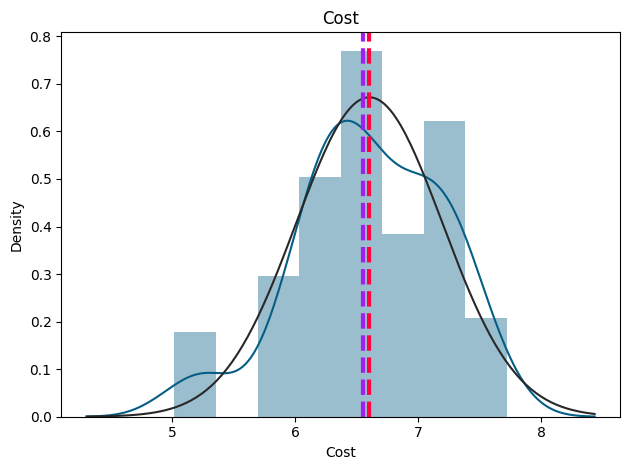

In [157]:
# Transform Your data
for i,col in enumerate(['Cost']) :
    sns.distplot(cluster_df[col], color = '#055E85', fit = norm);
    feature = cluster_df[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3,label= 'mean');  #red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3,label='median'); #cyan
    
    plt.title(f'{col.title()}');
    plt.tight_layout();

### 6. Data Scaling

In [158]:
# Scaling your data
cluster_dummy.sample(5)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
72,Labonel,6.908755,3.915,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
45,Owm Nom Nom,6.803505,3.290,4,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
33,Club Rogue,6.803505,2.880,2,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
62,Shree Santosh Dhaba Family Restaurant,6.216606,2.830,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
6,eat.fit,6.216606,3.200,4,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [159]:
#normalizing numerical columns
numerical_cols = ['Cost','Total_Cuisine_Count','Average_Rating']
scaler = StandardScaler()
scaler.fit(cluster_dummy[numerical_cols])
scaled_df = cluster_dummy.copy()
scaled_df[numerical_cols] = scaler.transform(cluster_dummy[numerical_cols])

In [160]:
scaled_df.sample(5)

,Restaurant,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,...,North Indian,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps
32,Marsala Food Company,-0.081910,-0.282342,-0.008305,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
44,La La Land - Bar & Kitchen,0.517960,-0.816636,0.822179,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
23,Amul,-2.667018,0.667515,-0.838788,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39,Deli 9 Bistro,-0.081910,0.430051,-0.008305,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,Arena Eleven,1.308749,1.019055,-1.669272,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Which method have you used to scale you data and why?

* Here I have used standard scaler as those numerical columns where normally distributed.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

In [161]:
#setting restaurant feature as index as it still had categorial value
scaled_df.set_index(['Restaurant'],inplace=True)

In [162]:
# DImensionality Reduction (If needed)
#extracting feature names
features = scaled_df.columns

pca = PCA()
#fitting pca
pca.fit(scaled_df[features])

PCA()

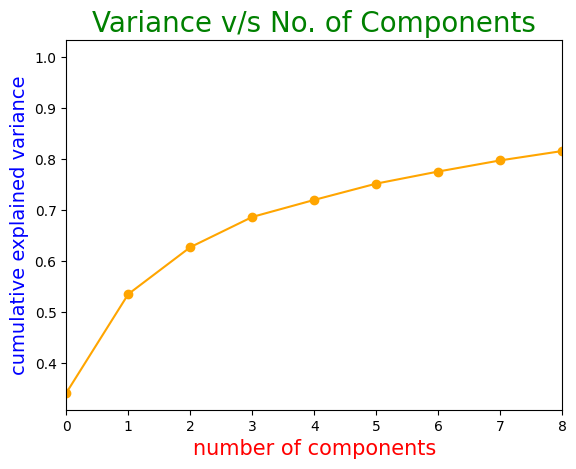

In [163]:
#explained variance v/s no. of components
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker ='o', color = 'orange')
plt.xlabel('number of components',size = 15, color = 'red')
plt.ylabel('cumulative explained variance',size = 14, color = 'blue')
plt.title('Variance v/s No. of Components',size = 20, color = 'green')
plt.xlim([0, 8])
plt.show()

In [164]:
#using n_component as 3 
pca = PCA(n_components=5)

# fit PCA on features
pca.fit(scaled_df[features])

# explained variance ratio of each principal component
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
# variance explained by three components
print('Cumulative variance explained by 5 principal components: {:.2%}'.format(
                                        np.sum(pca.explained_variance_ratio_)))

# transform data to principal component space
df_pca = pca.transform(scaled_df[features])

Explained variation per principal component: [0.34148554 0.1936559  0.0919578  0.05928255 0.03338862]
Cumulative variance explained by 5 principal components: 71.98%


In [165]:
#shape
print("original shape: ", scaled_df.shape)
print("transformed shape:", df_pca.shape)

original shape:  (100, 47)
transformed shape: (100, 5)


##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We used principle component analysis for dimensionality reduction

### 8. Data Splitting

In [166]:
# Split your data to train and test. Choose Splitting ratio wisely.
# for sentiment analysis using sentiment_df dataframe
X = X_tfidf #from text vectorization
y = sentiment_df['Sentiment']

In [167]:
sentiment_df.shape

(9961, 6)

In [168]:
#spliting test train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (7968, 16694)
Number transactions y_train dataset:  (7968,)
Number transactions X_test dataset:  (1993, 16694)
Number transactions y_test dataset:  (1993,)


##### What data splitting ratio have you used and why? 

I have used 80:20 split which is one the most used split ratio. Since there was only 9961 data, therefore I have used more in training set.

### 9. Handling Imbalanced Dataset

Using class imbalance ratio (CIR) to measure data imbalance. The CIR is calculated as the ratio of the number of observations in the majority class (Nm) to the number of observations in the minority class (Nm). The CIR can be expressed as: CIR = Nm / Ns, where Nm is the number of observations in the majority class and Ns is the number of observations in the minority class.

In [169]:
count_df = sentiment_df['Sentiment'].value_counts().reset_index().rename(columns={'index':'Sentiment','Sentiment':'Count'})
count_df

,Sentiment,Count
0,1,6274
1,0,3687


In [170]:
#defining majority and minority class value
majority_class = count_df.Count[0]
minority_class = count_df.Count[1]

In [171]:
CIR = majority_class/minority_class
CIR

1.701654461621915

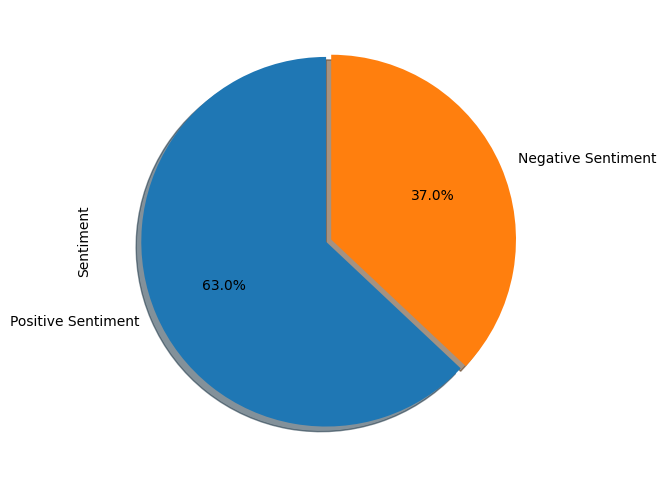

In [172]:
sentiment_df['Sentiment'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Positive Sentiment','Negative Sentiment'],
                               
                               explode=[0.01,0.02]
                              )
plt.show()

Yes, there is imbalance in dataset with 60: 40 ratio, where 60 is the majaority class and 40 is the minority class. Even the CIR score suggest that majority class is 1.73 times greater than minority class. However it is considered as slight imbalance, therefore not performing any under or over sampling technique i.e., not required to treat class imabalance

## ***7. ML Model Implementation***

### Clustering- 1

####K-Means Clustering

In [173]:
#calculating withi sum of square for different value of k 
WSS = []
for i in range(1,11):
  km = KMeans(n_clusters=i,random_state=20)
  km.fit(df_pca)
  WSS.append(km.inertia_)

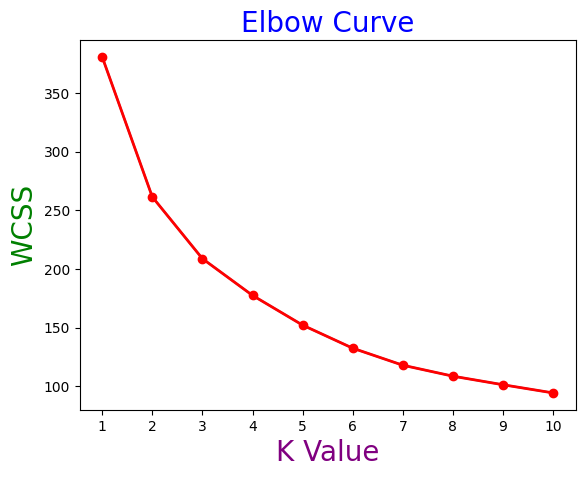

In [174]:
#elbow curve
plt.plot(range(1,11),WSS)
plt.plot(range(1,11),WSS, linewidth=2, color="red", marker ="o")
plt.xlabel("K Value", size = 20, color = 'purple')
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS", size = 20, color = 'green')
plt.title('Elbow Curve', size = 20, color = 'blue')
plt.show()

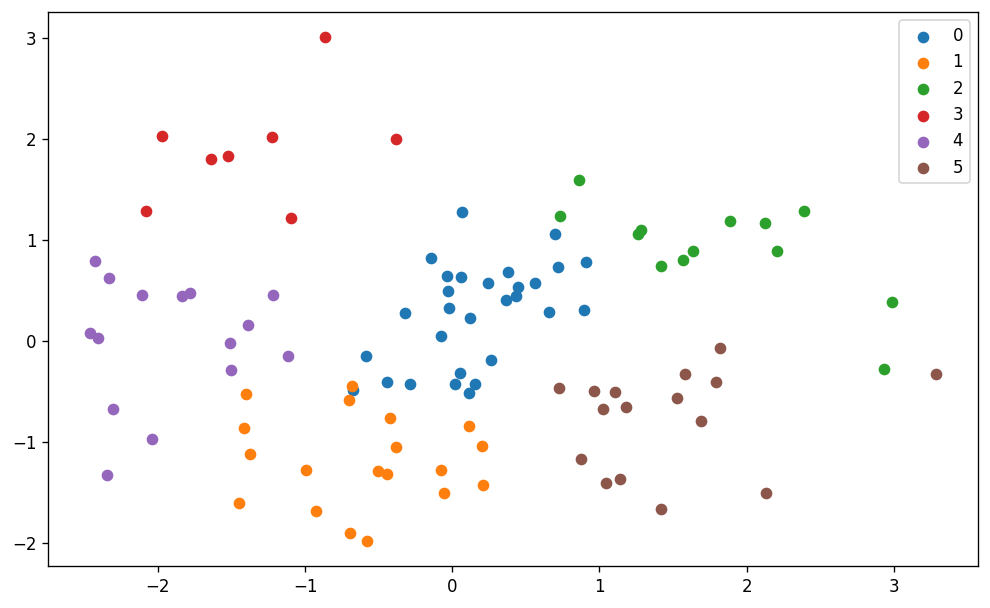

In [175]:
#vizualizing the clusters and the datapoints in each clusters
plt.figure(figsize = (10,6), dpi = 120)

kmeans= KMeans(n_clusters = 6, init= 'k-means++', random_state = 42)
kmeans.fit(df_pca)

#predict the labels of clusters.
label = kmeans.fit_predict(df_pca)
#Getting unique labels
unique_labels = np.unique(label)
 
#plotting the results:
for i in unique_labels:
    plt.scatter(df_pca[label == i , 0] , df_pca[label == i , 1] , label = i)

plt.legend()
plt.show()

In [176]:
#making df for pca
kmeans_pca_df = pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4','PC5'],index=scaled_df.index)
kmeans_pca_df["label"] = label
kmeans_pca_df.sample(4)

,PC1,PC2,PC3,PC4,PC5,label
Restaurant,,,,,,
Collage - Hyatt Hyderabad Gachibowli,-2.345590,-1.330638,-0.806915,0.557597,0.606987,4
Momos Delight,2.390376,1.280041,0.658136,-0.315569,0.440372,2
Pakwaan Grand,1.415839,-1.671019,-0.100770,-0.567603,-0.034727,5
B-Dubs,-0.864189,3.006060,-0.641929,-0.281276,-0.657542,3


In [177]:
#joining the cluster labels to cluster_dummy dataframe
cluster_dummy.set_index(['Restaurant'],inplace=True)
cluster_dummy = cluster_dummy.join(kmeans_pca_df['label'])
cluster_dummy.sample(3)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Dine O China,6.746412,3.370,3,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Cream Stone,5.860786,3.845,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
Shah Ghouse Hotel & Restaurant,6.685861,3.210,5,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1


In [178]:
#changing back cost value to original from log1p done during transformation
cluster_dummy['Cost'] = np.expm1(cluster_dummy['Cost'])
cluster_dummy.sample(2)

,Cost,Average_Rating,Total_Cuisine_Count,American,Andhra,Arabian,Asian,BBQ,Bakery,Beverages,...,Pizza,Salad,Seafood,South Indian,Spanish,Street Food,Sushi,Thai,Wraps,label
Restaurant,,,,,,,,,,,,,,,,,,,,,
Gal Punjab Di,800.0,3.61,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Khaan Saab,1100.0,3.80,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [179]:
#creating df to store cluster data
clustering_result = cluster_dummy.copy().reset_index()
clustering_result = hotel[['Restaurant','Cuisines']].merge(clustering_result[['Restaurant','Cost',
                  'Average_Rating',	'Total_Cuisine_Count','label']], on = 'Restaurant')
clustering_result.head()

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
0,Beyond Flavours,"Chinese, Continental, Kebab, European, South I...",800.0,4.28,6,4
1,Paradise,"Biryani, North Indian, Chinese",800.0,4.70,3,3
2,Flechazo,"Asian, Mediterranean, North Indian, Desserts",1300.0,4.66,4,3
3,Shah Ghouse Hotel & Restaurant,"Biryani, North Indian, Chinese, Seafood, Bever...",800.0,3.21,5,1
4,Over The Moon Brew Company,"Asian, Continental, North Indian, Chinese, Med...",1200.0,4.34,5,4


In [180]:
# Counting content in each cluster
cluster_count = cluster_dummy['label'].value_counts().reset_index().rename(
    columns={'index':'label','label':'Total_Restaurant'}).sort_values(by='Total_Restaurant')
cluster_count

,label,Total_Restaurant
5,3,8
4,2,13
3,4,15
2,5,16
1,1,19
0,0,29


In [181]:
#creating new df for checkign cuising in each cluster
new_cluster_df = clustering_result.copy()
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].str.split(',')
new_cluster_df = new_cluster_df.explode('Cuisines')
#removing extra trailing space from cuisines after exploded
new_cluster_df['Cuisines'] = new_cluster_df['Cuisines'].apply(lambda x: x.strip())
new_cluster_df.sample(5)

,Restaurant,Cuisines,Cost,Average_Rating,Total_Cuisine_Count,label
3,Shah Ghouse Hotel & Restaurant,Biryani,800.0,3.21,5,1
15,KFC,Burger,500.0,2.85,2,5
0,Beyond Flavours,Kebab,800.0,4.28,6,4
5,The Fisherman's Wharf,North Indian,1500.0,4.22,5,4
40,Frio Bistro,Spanish,1200.0,3.61,4,4


In [182]:
#printing cuisine list for each cluster
for cluster in new_cluster_df['label'].unique().tolist():
  print('Cuisine List for Cluster :', cluster,'\n')
  print(new_cluster_df[new_cluster_df["label"]== cluster]['Cuisines'].unique(),'\n')
  print('-'*120)

Cuisine List for Cluster : 4 

['Chinese' 'Continental' 'Kebab' 'European' 'South Indian' 'North Indian'
 'Asian' 'Mediterranean' 'Seafood' 'Goan' 'BBQ' 'Japanese' 'Italian'
 'Salad' 'Sushi' 'Spanish' 'Modern Indian'] 

------------------------------------------------------------------------------------------------------------------------
Cuisine List for Cluster : 3 

['Biryani' 'North Indian' 'Chinese' 'Asian' 'Mediterranean' 'Desserts'
 'European' 'American' 'BBQ' 'Modern Indian' 'Continental' 'Sushi'] 

------------------------------------------------------------------------------------------------------------------------
Cuisine List for Cluster : 1 

['Biryani' 'North Indian' 'Chinese' 'Seafood' 'Beverages' 'Healthy Food'
 'Continental' 'South Indian' 'American' 'Kebab' 'Mexican' 'Italian'
 'Salad' 'Bakery' 'Mughlai' 'Juices' 'Andhra' 'Hyderabadi' 'Finger Food'
 'Thai' 'Indonesian' 'Asian' 'Japanese' 'Sushi' 'Momos' 'Desserts' 'Cafe'
 'Burger' 'Fast Food'] 

---------------------

### ML Model - 2 Sentiment Analysis

In [183]:
#creating copy to store predicted sentiments
review_sentiment_prediction = review[review_df.columns.to_list()].copy()
review_sentiment_prediction.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0


In [184]:
#defining function to calculate score
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score
from tabulate import tabulate
import itertools


#calculating score
def calculate_scores(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    # Get the confusion matrix for both train and test

    cm = confusion_matrix(y_test, y_pred)
    plt.imshow(cm, cmap='Wistia')

    # Add labels to the plot
    class_names = ["Positive", "Negative"]
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    # Add values inside the confusion matrix
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    # Add a title and x and y labels
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    plt.show()
    print(cm)
    return roc_auc, f1, accuracy, precision, recall

#printing result
def print_table(model, X_train, y_train, X_test, y_test):
    roc_auc, f1, accuracy, precision, recall = calculate_scores(model, X_train, y_train, X_test, y_test)
    table = [["ROC AUC", roc_auc], ["Precision", precision], 
             ["Recall", recall], ["F1", f1], ["Accuracy", accuracy]]
    print(tabulate(table, headers=["Metric", "Score"]))

##**Logistic Regression**

In [185]:
#logisctic regression
from sklearn.linear_model import LogisticRegression

# create and fit the model
clf = LogisticRegression()

##**XgBoost**

In [186]:
#XgBoost
from xgboost import XGBClassifier

#create and fit the model
xgb = XGBClassifier()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

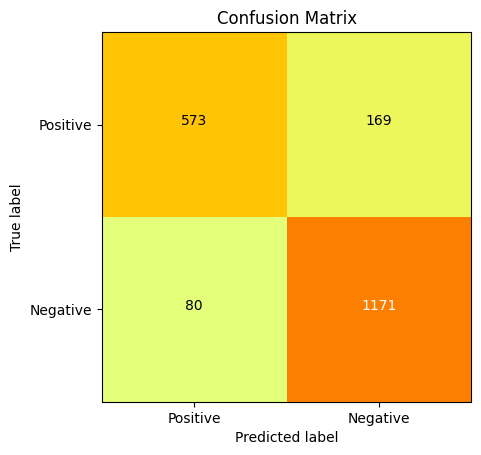

[[ 573  169]
 [  80 1171]]
Metric        Score
---------  --------
ROC AUC    0.854144
Precision  0.873881
Recall     0.936051
F1         0.903898
Accuracy   0.875063


In [187]:
# Visualizing evaluation Metric Score chart for logistic regression
# printing result
print_table(clf, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 557 instances are labeled as True Positive (correctly predicted as positive)
* 81 instances are labeled as False Positive (incorrectly predicted as positive)
* 1183 instances are labeled as True Negative (correctly predicted as negative)
* 172 instances are labeled as False Negative (incorrectly predicted as negative)

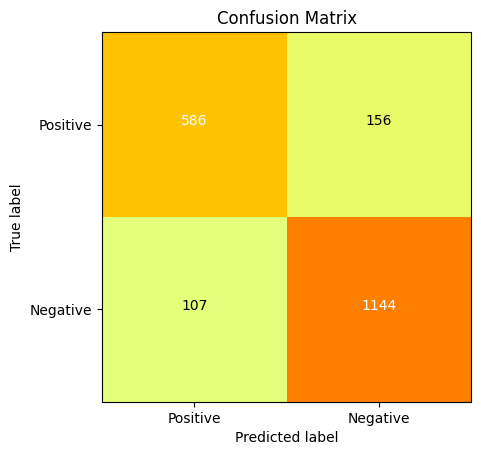

[[ 586  156]
 [ 107 1144]]
Metric        Score
---------  --------
ROC AUC    0.852113
Precision  0.88
Recall     0.914468
F1         0.896903
Accuracy   0.868038


In [188]:
# Visualizing evaluation Metric Score chart for XgBoost
# printing result
print_table(xgb, X_train, y_train, X_test, y_test)

#### 2. Cross- Validation & Hyperparameter Tuning

In [189]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

#logistic regression
# finding the best parameters for LogisticRegression by gridsearchcv
param_dict = {'C': [0.1,1,10,100,1000],'penalty': ['l1', 'l2'],'max_iter':[1000]} 
clf_grid = GridSearchCV(clf, param_dict,n_jobs=-1, cv=5, verbose = 5,scoring='recall') 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


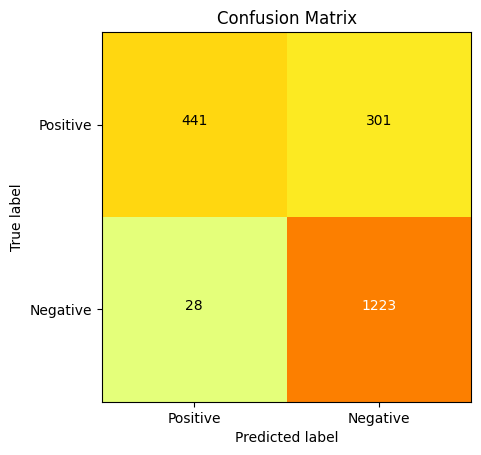

[[ 441  301]
 [  28 1223]]
Metric        Score
---------  --------
ROC AUC    0.785979
Precision  0.802493
Recall     0.977618
F1         0.881441
Accuracy   0.834922


In [190]:
# printing result
print_table(clf_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 400 instances are labeled as True Positive (correctly predicted as positive)
* 30 instances are labeled as False Positive (incorrectly predicted as positive)
* 1234 instances are labeled as True Negative (correctly predicted as negative)
* 329 instances are labeled as False Negative (incorrectly predicted as negative)

##**XGboost**

In [191]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgb_param={'n_estimators': [100,125,150],'max_depth': [7,10,15],'criterion': ['entropy']}
xgb_grid=GridSearchCV(estimator=xgb,param_grid = xgb_param,cv=3,scoring='recall',verbose=5,n_jobs = -1)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[07:29:43] WARNING: ../src/learner.cc:767: 
Parameters: { "criterion" } are not used.



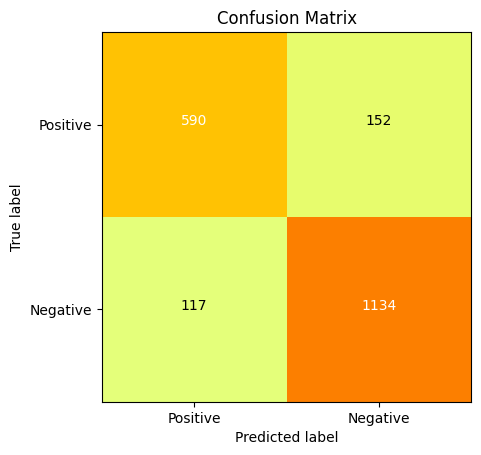

[[ 590  152]
 [ 117 1134]]
Metric        Score
---------  --------
ROC AUC    0.850812
Precision  0.881804
Recall     0.906475
F1         0.893969
Accuracy   0.865028


In [192]:
# printing result for gridsearch Xgb
print_table(xgb_grid, X_train, y_train, X_test, y_test)

The first row of the matrix represents the predicted positive class (1) and the second row represents the predicted negative class (0). The first column represents the actual positive class (1) and the second column represents the actual negative class (0).

* 572 instances are labeled as True Positive (correctly predicted as positive)
* 130 instances are labeled as False Positive (incorrectly predicted as positive)
* 1134 instances are labeled as True Negative (correctly predicted as negative)
* 157 instances are labeled as False Negative (incorrectly predicted as negative)

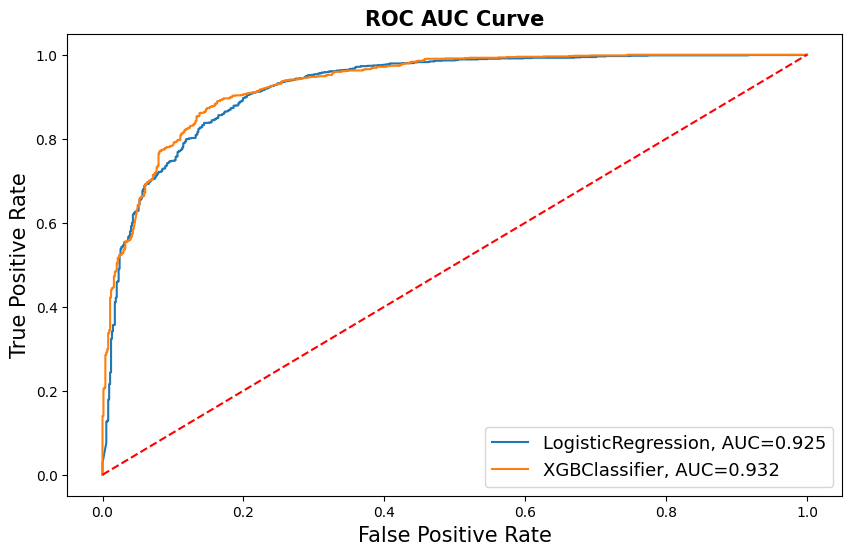

In [193]:
#Plotting graph
from sklearn.metrics import roc_curve
# finding the best parameters for all the models
log_reg_best = clf_grid.best_estimator_
xgbc_best = xgb_grid.best_estimator_

# predicting the sentiment by all models
y_preds_proba_lr = log_reg_best.predict_proba(X_test)[::,1]
y_preds_proba_xgbc = xgbc_best.predict_proba(X_test)[::,1]

classifiers_proba = [(log_reg_best, y_preds_proba_lr),
                    (xgbc_best, y_preds_proba_xgbc)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# ploting the roc auc curve for all models
fig = plt.figure(figsize=(10,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1],'r--')

plt.xlabel("False Positive Rate", fontsize=15)

plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC AUC Curve', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model. But the question arises, how to find these best sets of hyperparameters? One can try the Manual Search method, by using the hit and trial process and can find the best hyperparameters which would take huge time to build a single model.

For this reason, methods like Random Search, GridSearch were introduced. Grid Search uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters. This makes the processing time-consuming and expensive based on the number of hyperparameters involved.

In GridSearchCV, along with Grid Search, cross-validation is also performed. Cross-Validation is used while training the model.

That's why I have used GridsearCV method for hyperparameter optimization.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Overall for XgBoost Classifier there is a improvement i.e., it changes from 

* Metric    ⏸    Score
* ROC AUC    0.842767
* Precision  0.87935
* Recall     0.899525
* F1         0.889323
* Accuracy   0.858003


to this ▶ 

* Metric      ⏸ Score
---------     --------
* ROC AUC    0.840894
* Precision  0.878389
* Recall     0.897152
* F1         0.887671
* Accuracy   0.855996

and after tunning 
* 572 instances are labeled as True Positive (correctly predicted as positive)
* 130 instances are labeled as False Positive (incorrectly predicted as positive)
* 1134 instances are labeled as True Negative (correctly predicted as negative)
* 157 instances are labeled as False Negative (incorrectly predicted as negative)

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [194]:
!pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 31.2 MB/s eta 0:00:00


In [195]:
import shap


In [196]:
#Get shap values
explainer = shap.Explainer(xgb)
shap_values = explainer(X_test) 

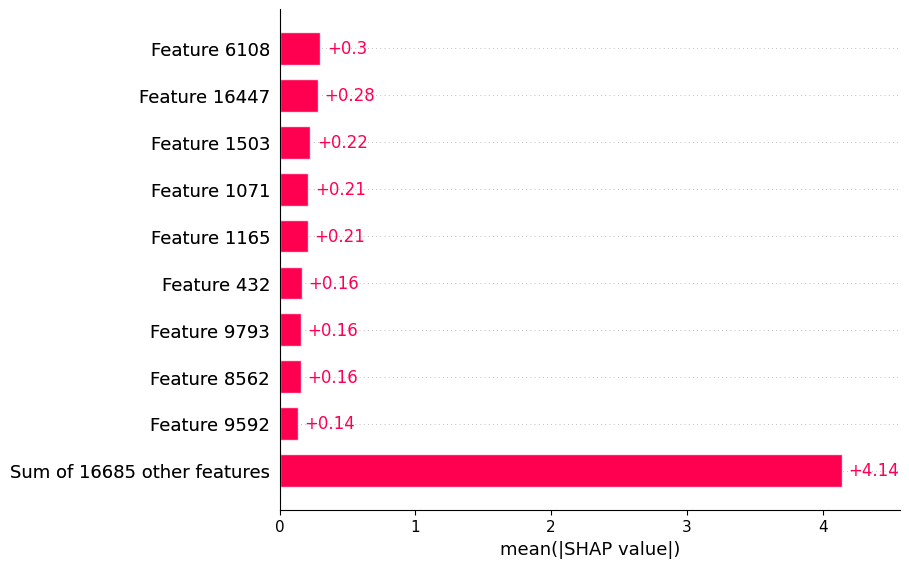

In [197]:
#Mean SHAP
shap.plots.bar(shap_values)

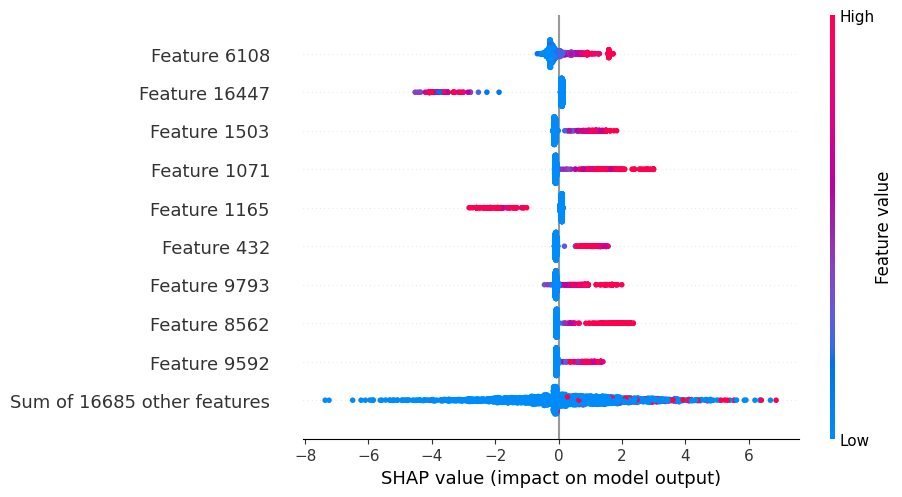

In [198]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [199]:
# Save the File
# import joblib

# Save the model to a file
# joblib.dump(model, 'model.joblib')

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [200]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Clustering and sentiment analysis were performed on a dataset of customer reviews for the food delivery service Zomato. The purpose of this analysis was to understand the customer's experience and gain insights about their feedback.

The clustering technique was applied to group customers based on their review text, and it was found that the customers were grouped into two clusters: positive and negative. This provided a general understanding of customer satisfaction levels, with the positive cluster indicating the highest level of satisfaction and the negative cluster indicating the lowest level of satisfaction.

Sentiment analysis was then applied to classify the review text as positive or negative. This provided a more detailed understanding of customer feedback and helped to identify specific areas where the service could be improved.

Overall, this analysis provided valuable insights into the customer's experience with Zomato, and it could be used to guide future business decisions and improve the service. Additionally, by combining clustering and sentiment analysis techniques, a more comprehensive understanding of customer feedback was achieved. 

Other important discoveries during analysis are - 
* AB's - Absolute Barbecues, show maximum engagement and retention as it has maximum number of rating on average and Hotel Zara Hi-Fi show lowest engagement as has lowest average rating.

* Price point for high rated hotel AB's= Absolute Barbecues is 1500 and price point for low rated restaurant Hotel Zara Hi-Fi is 400.

* North Indian food followed by chinese are best or indeemand food as sold by most of the restaurants.

* Great Buffets is the most frequently used tags and other tags like great, best, north, Hyderabad is also used in large quantity.

* Satwinder singh is the most popular critic who has maximum number of follower and on an average he give 3.5 rating.

* restaurant Collage - Hyatt Hyderabad Gachibowli is most expensive restaurant in the locality which has a price of 2800 for order and has 3.5 average rating. Hotels like Amul and Mohammedia Shawarma are least expensive with price of 150 and has 3.9 average rating.

Some recommendation based on the analysis ▶
* Based on negative reviews like some focused on issues with delivery time or food quality, the company should prioritize addressing these issues to imporve customer satisfaction.

* Based on the clustering, or user interaction customer should be given recommendations.

* Also use the clustering results to target specific customer segments and tailor marketing and promotional efforts accordingly.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***